In [ ]:
!pip install plotly
!pip install cufflinks
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from pandas_profiling import ProfileReport
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data import and preparation

In [ ]:
df1 = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df2 = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
#
display(df1.head(), df2.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
df1_Germany = df1.loc[df1['location'] == 'Germany']
df2_Germany = df2.loc[df2['Country'] == 'Germany']
df1_Japan = df1.loc[df1['location'] == 'Japan']
df2_Japan = df2.loc[df2['Country'] == 'Japan']
df1_USA = df1.loc[df1['location'] == 'United States']

display(df1_Germany.head(),df1_Japan.head(),df1_USA)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
97416,DEU,Europe,Germany,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,33.1,NaN,8.0,81.33,0.947,83369840.0,NaN,NaN,NaN,NaN
97417,DEU,Europe,Germany,2020-01-04,1.0,1.0,NaN,NaN,0.0,NaN,...,33.1,NaN,8.0,81.33,0.947,83369840.0,NaN,NaN,NaN,NaN
97418,DEU,Europe,Germany,2020-01-05,1.0,0.0,NaN,NaN,0.0,NaN,...,33.1,NaN,8.0,81.33,0.947,83369840.0,-760.7,-3.87,-3.87,-9.128876
97419,DEU,Europe,Germany,2020-01-06,1.0,0.0,NaN,NaN,0.0,NaN,...,33.1,NaN,8.0,81.33,0.947,83369840.0,NaN,NaN,NaN,NaN
97420,DEU,Europe,Germany,2020-01-07,1.0,0.0,NaN,NaN,0.0,NaN,...,33.1,NaN,8.0,81.33,0.947,83369840.0,NaN,NaN,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130677,JPN,Asia,Japan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
130678,JPN,Asia,Japan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
130679,JPN,Asia,Japan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
130680,JPN,Asia,Japan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
130681,JPN,Asia,Japan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
282996,USA,North America,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
282997,USA,North America,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
282998,USA,North America,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,-2336.0,-3.72,-3.72,-6.953581
282999,USA,North America,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
283000,USA,North America,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284180,USA,North America,United States,2023-04-01,102873924.0,176358.0,25194.0,1118800.0,1746.0,249.429,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
284181,USA,North America,United States,2023-04-02,102873924.0,NaN,NaN,1118800.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
284182,USA,North America,United States,2023-04-03,102873924.0,NaN,NaN,1118800.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
284183,USA,North America,United States,2023-04-04,102873924.0,NaN,NaN,1118800.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [ ]:
display(df1_Japan.tail(10))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131856,JPN,Asia,Japan,2023-03-27,33424672.0,2887.0,6823.429,73764.0,17.0,33.000,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131857,JPN,Asia,Japan,2023-03-28,33433117.0,8445.0,6789.429,73791.0,27.0,32.714,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131858,JPN,Asia,Japan,2023-03-29,33441444.0,8327.0,7341.857,73791.0,0.0,28.429,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131859,JPN,Asia,Japan,2023-03-30,33441444.0,0.0,6129.714,73825.0,34.0,27.571,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131860,JPN,Asia,Japan,2023-03-31,33441444.0,0.0,4895.571,73825.0,0.0,20.571,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131861,JPN,Asia,Japan,2023-04-01,33441444.0,0.0,3711.857,73908.0,83.0,26.143,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131862,JPN,Asia,Japan,2023-04-02,33462859.0,21415.0,5867.714,73939.0,31.0,27.429,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131863,JPN,Asia,Japan,2023-04-03,33469149.0,6290.0,6353.857,73953.0,14.0,27.000,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131864,JPN,Asia,Japan,2023-04-04,33469149.0,NaN,NaN,73953.0,NaN,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
131865,JPN,Asia,Japan,2023-04-05,33469149.0,NaN,NaN,73953.0,NaN,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN


In [ ]:
display(df1_Japan.info(), df1_Germany.info(), df1_USA.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 130677 to 131865
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1189 non-null   object 
 1   continent                                   1189 non-null   object 
 2   location                                    1189 non-null   object 
 3   date                                        1189 non-null   object 
 4   total_cases                                 1178 non-null   float64
 5   new_cases                                   1187 non-null   float64
 6   new_cases_smoothed                          1182 non-null   float64
 7   total_deaths                                1148 non-null   float64
 8   new_deaths                                  1187 non-null   float64
 9   new_deaths_smoothed                         1182 non-null   float64
 10  total

None

None

None

In [ ]:
# df1_China['aged_70_older'].unique()

In [ ]:
def drop_columns(data):
  data.drop(columns = ['reproduction_rate',

                'population_density',
                'median_age',
                'aged_65_older',
                'aged_70_older',
                'gdp_per_capita',
                'extreme_poverty',
                'cardiovasc_death_rate',
                'diabetes_prevalence',
                'female_smokers',
                'male_smokers',
                'handwashing_facilities',
                'hospital_beds_per_thousand',
                'life_expectancy',
                'human_development_index',
                'icu_patients',
                'icu_patients_per_million',
                'hosp_patients',
                'hosp_patients_per_million',
                'weekly_icu_admissions',
                'weekly_icu_admissions_per_million',
                'weekly_hosp_admissions',
                'weekly_hosp_admissions_per_million',
                'total_tests',
                'new_tests',
                'total_tests_per_thousand',
                'new_tests_per_thousand',
                'new_tests_smoothed',
                'new_tests_smoothed_per_thousand',
                'positive_rate',
                'tests_per_case',
                'tests_units',
                'excess_mortality_cumulative_absolute',
                'excess_mortality_cumulative',
                'excess_mortality',
                'excess_mortality_cumulative_per_million',
                'total_boosters',
                "total_boosters_per_hundred",
                'iso_code',
                'continent',
                ], axis = 1, inplace = True)
  return data

In [ ]:
df1_Germany = drop_columns(df1_Germany)
df1_Japan = drop_columns(df1_Japan)
df1_USA = drop_columns(df1_USA)

<ipython-input-839-bac67958998f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-839-bac67958998f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-839-bac67958998f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#df1_China['mortality_rate'] = df1['total_deaths']/df1['total_cases']

In [ ]:
display(df1_Germany.info(),df1_Japan.info(), df1_USA.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 97416 to 98604
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   location                                    1189 non-null   object 
 1   date                                        1189 non-null   object 
 2   total_cases                                 1188 non-null   float64
 3   new_cases                                   1188 non-null   float64
 4   new_cases_smoothed                          1183 non-null   float64
 5   total_deaths                                1140 non-null   float64
 6   new_deaths                                  1189 non-null   float64
 7   new_deaths_smoothed                         1184 non-null   float64
 8   total_cases_per_million                     1188 non-null   float64
 9   new_cases_per_million                       1188 non-null   float64
 10  new_cas

None

None

None

In [ ]:
def rolling_weeks_total(data):
  data[ '7day_rolling_avg_total' ] = data.total_cases.rolling(7).mean()
  return data

# viewing the dataset
rolling_weeks_total(df1_Germany)
rolling_weeks_total(df1_Japan)
rolling_weeks_total(df1_USA)

<ipython-input-843-461c5a8f7559>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-843-461c5a8f7559>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-843-461c5a8f7559>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,7day_rolling_avg_total
282996,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN
282997,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN
282998,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN
282999,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN
283000,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284180,United States,2023-04-01,102873924.0,176358.0,25194.0,1118800.0,1746.0,249.429,304099.937,521.322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102722760.0
284181,United States,2023-04-02,102873924.0,NaN,NaN,1118800.0,NaN,NaN,304099.937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102747954.0
284182,United States,2023-04-03,102873924.0,NaN,NaN,1118800.0,NaN,NaN,304099.937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102773148.0
284183,United States,2023-04-04,102873924.0,NaN,NaN,1118800.0,NaN,NaN,304099.937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102798342.0


In [ ]:
def rolling_weeks_daily(data):
  data[ '7day_rolling_avg_daily' ] = data.new_cases.rolling(7).mean()
  return data

# viewing the dataset
rolling_weeks_daily(df1_Germany)
rolling_weeks_daily(df1_Japan)
rolling_weeks_daily(df1_USA)

<ipython-input-844-654b1226804f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-844-654b1226804f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-844-654b1226804f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,7day_rolling_avg_total,7day_rolling_avg_daily
282996,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN,NaN
282997,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN,NaN
282998,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN,NaN
282999,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN,NaN
283000,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284180,United States,2023-04-01,102873924.0,176358.0,25194.0,1118800.0,1746.0,249.429,304099.937,521.322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102722760.0,25194.0
284181,United States,2023-04-02,102873924.0,NaN,NaN,1118800.0,NaN,NaN,304099.937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102747954.0,NaN
284182,United States,2023-04-03,102873924.0,NaN,NaN,1118800.0,NaN,NaN,304099.937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102773148.0,NaN
284183,United States,2023-04-04,102873924.0,NaN,NaN,1118800.0,NaN,NaN,304099.937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856.0,102798342.0,NaN


In [ ]:
def set_index(data):
  data['date'] = pd.to_datetime(data.date)
  data.set_index('date', inplace=True)

In [ ]:
set_index(df1_Japan)
set_index(df1_Germany)
set_index(df1_USA)

<ipython-input-845-3f44eddc2d40>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-845-3f44eddc2d40>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-845-3f44eddc2d40>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#

In [ ]:
# start_date = '2022-02-01'
# # end_date = '2022-03-21'
# mask = (df1['date'] > start_date)
def time_loc(data):
  data_1 = data.loc['2022-3-1': '2023-3-1']
  return data_1
# df1_4wave = df1.loc['2021-12-1': '2022-1-31']
# df1_5wave = df1.loc['2022-2-1': '2022-4-3']

df1_Japan_1 = time_loc(df1_Japan)
df1_Germany_1 = time_loc(df1_Germany)
df1_USA_1 = time_loc(df1_USA)

In [ ]:
display(df1_Japan_1.info(),df1_Germany_1.info(),df1_USA_1.info())#可以进行回归模型的建立，变量为疫苗率相关数据

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-03-01 to 2023-03-01
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   location                                    366 non-null    object 
 1   total_cases                                 366 non-null    float64
 2   new_cases                                   366 non-null    float64
 3   new_cases_smoothed                          366 non-null    float64
 4   total_deaths                                366 non-null    float64
 5   new_deaths                                  366 non-null    float64
 6   new_deaths_smoothed                         366 non-null    float64
 7   total_cases_per_million                     366 non-null    float64
 8   new_cases_per_million                       366 non-null    float64
 9   new_cases_smoothed_per_million              366 non-null    float64


None

None

None

In [ ]:
df1_Japan_1['7day_rolling_avg_daily'].tail(30)

date
2023-01-31    51600.714286
2023-02-01    48198.285714
2023-02-02    46114.571429
2023-02-03    44116.428571
2023-02-04    41802.000000
2023-02-05    40049.142857
2023-02-06    39218.571429
2023-02-07    38881.000000
2023-02-08    36887.714286
2023-02-09    35126.285714
2023-02-10    33510.714286
2023-02-11    31909.285714
2023-02-12    29235.142857
2023-02-13    28351.000000
2023-02-14    26538.857143
2023-02-15    24708.571429
2023-02-16    23048.285714
2023-02-17    21618.428571
2023-02-18    20154.571429
2023-02-19    20225.857143
2023-02-20    19882.571429
2023-02-21    18074.000000
2023-02-22    16628.571429
2023-02-23    15749.428571
2023-02-24    14021.714286
2023-02-25    13696.285714
2023-02-26    13433.428571
2023-02-27    13230.285714
2023-02-28    12532.285714
2023-03-01    11860.285714
Name: 7day_rolling_avg_daily, dtype: float64

## Data Visualization


In [ ]:
display(df1_Japan_1['7day_rolling_avg_daily'].describe(),df1_Germany_1['7day_rolling_avg_daily'].describe(), df1_USA_1['7day_rolling_avg_daily'].describe())

count       366.000000
mean      77690.268540
std       58643.149010
min       11860.285714
25%       34498.857143
50%       51209.428571
75%      112360.821429
max      227836.714286
Name: 7day_rolling_avg_daily, dtype: float64

count       366.000000
mean      64697.334504
std       54995.346018
min        8929.000000
25%       27276.392857
50%       42660.357143
75%       89096.464286
max      233200.285714
Name: 7day_rolling_avg_daily, dtype: float64

count       366.000000
mean      64952.558548
std       30701.917002
min           0.000000
25%       39746.857143
50%       56029.000000
75%       93811.428571
max      135426.142857
Name: 7day_rolling_avg_daily, dtype: float64

In [ ]:
#display the dataframe for comparsion
data = {
  'Japan': df1_Japan_1['7day_rolling_avg_daily'],
  'Germany': df1_Germany_1['7day_rolling_avg_daily'],
  'USA': df1_USA_1['7day_rolling_avg_daily']
}
df = pd.DataFrame(data)
df.describe()

,Japan,Germany,USA
count,366.000000,366.000000,366.000000
mean,77690.268540,64697.334504,64952.558548
std,58643.149010,54995.346018,30701.917002
min,11860.285714,8929.000000,0.000000
25%,34498.857143,27276.392857,39746.857143
50%,51209.428571,42660.357143,56029.000000
75%,112360.821429,89096.464286,93811.428571
max,227836.714286,233200.285714,135426.142857


In [ ]:
def cases_por(data):
  data['proportion'] = data['7day_rolling_avg_total']/data['population']
  return data

In [ ]:
cases_por(df1_Japan_1)
cases_por(df1_Germany_1)
cases_por(df1_USA_1)

<ipython-input-852-9c2bf92626cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-852-9c2bf92626cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-852-9c2bf92626cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,7day_rolling_avg_total,7day_rolling_avg_daily,proportion
date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,United States,78377959.0,18169.0,61447.429,948098.0,360.0,1811.143,231688.765,53.708,181.641,...,76.61,65.76,883.0,72823.0,0.022,37.11,338289856.0,7.823204e+07,61447.428571,0.231257
2022-03-02,United States,78454196.0,76237.0,65422.286,950400.0,2302.0,1982.857,231914.125,225.360,193.391,...,76.63,65.78,847.0,69843.0,0.021,37.10,338289856.0,7.829746e+07,65422.285714,0.231451
2022-03-03,United States,78518015.0,63819.0,58107.571,952371.0,1971.0,1799.857,232102.777,188.652,171.769,...,76.65,65.80,814.0,67275.0,0.020,34.66,338289856.0,7.835557e+07,58107.571429,0.231623
2022-03-04,United States,78570799.0,52784.0,55125.000,953907.0,1536.0,1646.286,232258.809,156.032,162.952,...,76.67,65.83,781.0,64788.0,0.020,34.66,338289856.0,7.841070e+07,55125.000000,0.231786
2022-03-05,United States,78622421.0,51622.0,51776.429,955271.0,1364.0,1485.714,232411.406,152.597,153.053,...,76.69,65.84,755.0,62565.0,0.019,34.65,338289856.0,7.846247e+07,51776.428571,0.231939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25,United States,102019564.0,267168.0,38166.857,1109145.0,2362.0,337.429,301574.411,789.761,112.823,...,81.20,69.32,173.0,11075.0,0.003,NaN,338289856.0,1.017906e+08,38166.857143,0.300897
2023-02-26,United States,102019564.0,0.0,38166.857,1109145.0,0.0,337.429,301574.411,0.000,112.823,...,81.20,69.32,172.0,11062.0,0.003,NaN,338289856.0,1.018287e+08,38166.857143,0.301010
2023-02-27,United States,102019564.0,0.0,38166.857,1109145.0,0.0,337.429,301574.411,0.000,112.823,...,81.21,69.32,176.0,11460.0,0.003,NaN,338289856.0,1.018669e+08,38166.857143,0.301123


In [ ]:
data_1 = {
  'Japan': df1_Japan_1['proportion'],
  'Germany': df1_Germany_1['proportion'],
  'USA': df1_USA_1['proportion']
}
df_1 = pd.DataFrame(data_1)
df_1.describe()

,Japan,Germany,USA
count,366.000000,366.000000,366.000000
mean,0.141295,0.368776,0.268380
std,0.074670,0.075023,0.022933
min,0.038845,0.175189,0.231257
25%,0.070716,0.315401,0.245397
50%,0.146815,0.384606,0.274517
75%,0.197836,0.436589,0.287467
max,0.267709,0.457362,0.301349


<Axes: xlabel='date', ylabel='7day_rolling_avg_total'>

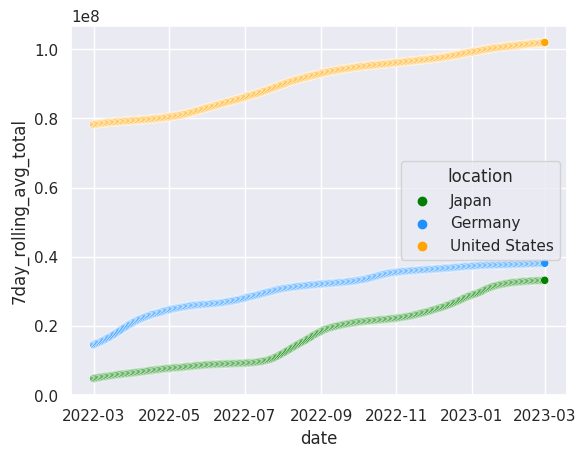

In [ ]:
sns.set_theme(style="darkgrid")
sns.scatterplot(data = df1_Japan_1, x = df1_Japan_1.index, y = '7day_rolling_avg_total',hue = 'location',palette = ['green'])
sns.scatterplot(data = df1_Germany_1, x = df1_Germany_1.index, y = '7day_rolling_avg_total',hue = 'location',palette =['dodgerblue'] )
sns.scatterplot(data = df1_USA_1, x = df1_USA_1.index, y = '7day_rolling_avg_total',hue = 'location', palette = ['orange'] )

<Axes: xlabel='date', ylabel='proportion'>

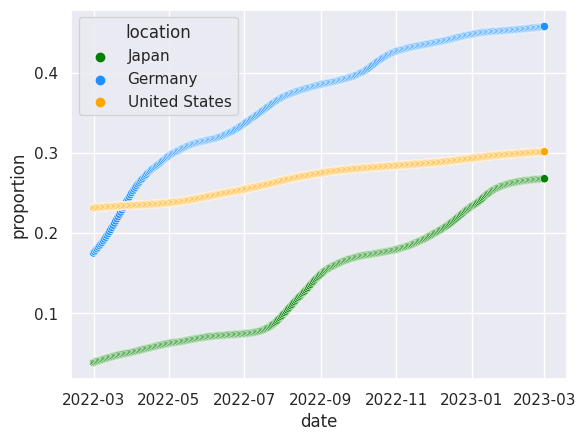

In [ ]:
sns.set_theme(style="darkgrid")
sns.scatterplot(data = df1_Japan_1, x = df1_Japan_1.index, y = 'proportion',hue = 'location',palette = ['green'])
sns.scatterplot(data = df1_Germany_1, x = df1_Germany_1.index, y = 'proportion',hue = 'location',palette =['dodgerblue'] )
sns.scatterplot(data = df1_USA_1, x = df1_USA_1.index, y = 'proportion',hue = 'location', palette = ['orange'] )

<Axes: xlabel='date', ylabel='7day_rolling_avg_daily'>

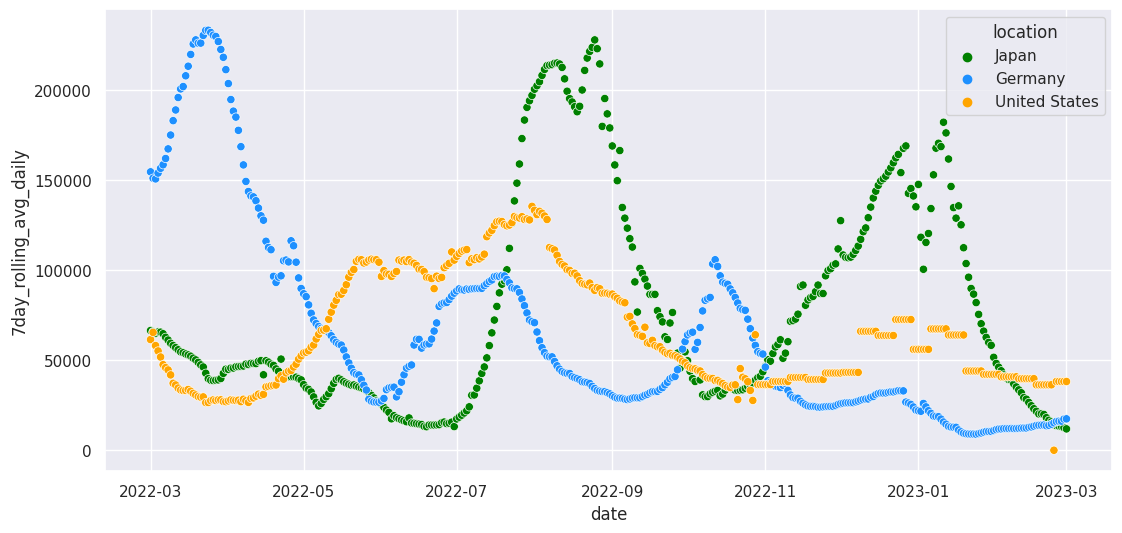

In [ ]:
plt.figure(figsize=(13,6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data = df1_Japan_1, x = df1_Japan_1.index, y = '7day_rolling_avg_daily',hue = 'location',palette = ['green'] )
sns.scatterplot(data = df1_Germany_1, x = df1_Germany_1.index, y = '7day_rolling_avg_daily',hue = 'location',palette =['dodgerblue'] )
sns.scatterplot(data = df1_USA_1, x = df1_USA_1.index, y = '7day_rolling_avg_daily',hue = 'location', palette = ['orange'] )
#we can conclude that the vaccination is not functioal

<Axes: xlabel='date', ylabel='total_vaccinations_per_hundred'>

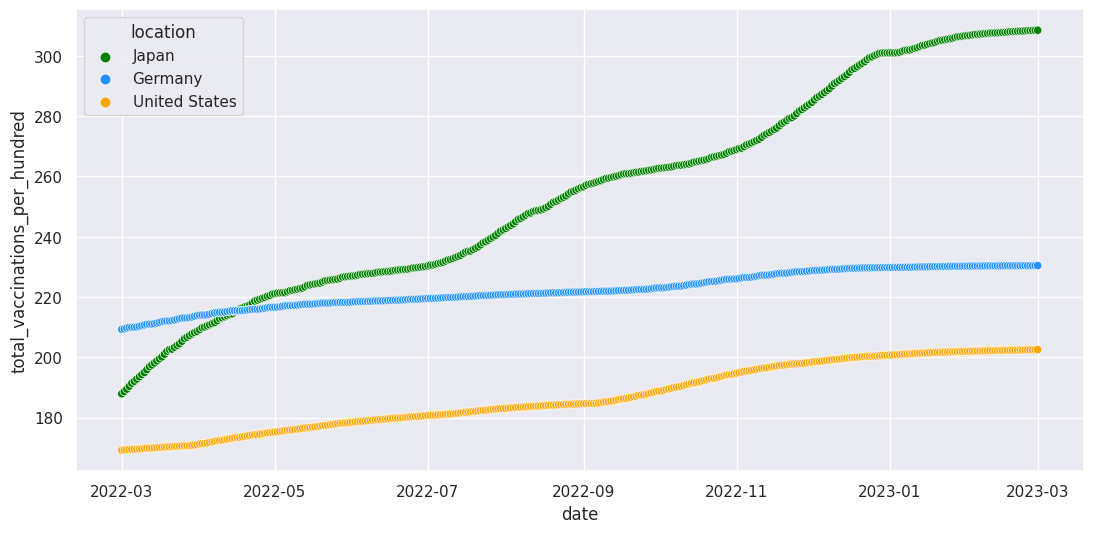

In [ ]:
plt.figure(figsize=(13,6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data = df1_Japan_1, x = df1_Japan_1.index, y = 'total_vaccinations_per_hundred',hue = 'location',palette = ['green'] )
sns.scatterplot(data = df1_Germany_1, x = df1_Germany_1.index, y = 'total_vaccinations_per_hundred',hue = 'location',palette =['dodgerblue'] )
sns.scatterplot(data = df1_USA_1, x = df1_USA_1.index, y = 'total_vaccinations_per_hundred',hue = 'location', palette = ['orange'] )

##useless


In [ ]:
# def enable_plotly_in_cell():
#   import IPython
#   from plotly.offline import init_notebook_mode
#   display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
#   init_notebook_mode(connected=False)

In [ ]:
#   enable_plotly_in_cell()
# px.scatter(df1_Japan_1, x = df1_Japan_1.index, y = 'total_cases',trendline="ols",width=600, height=400)

## **prepare and Scale the dataset**


In [ ]:
#here we drop out the column we do want
# df1_Japam_2 = df1_Japan_1.drop(columns = ['location',''

In [ ]:
# df1_Japan = df1_Japan.reset_index()

In [ ]:
df1_Japan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1189 entries, 2020-01-03 to 2023-04-05
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   location                                    1189 non-null   object 
 1   total_cases                                 1178 non-null   float64
 2   new_cases                                   1187 non-null   float64
 3   new_cases_smoothed                          1182 non-null   float64
 4   total_deaths                                1148 non-null   float64
 5   new_deaths                                  1187 non-null   float64
 6   new_deaths_smoothed                         1182 non-null   float64
 7   total_cases_per_million                     1178 non-null   float64
 8   new_cases_per_million                       1187 non-null   float64
 9   new_cases_smoothed_per_million              1182 non-null   float64

In [ ]:
df1_Japan.drop(columns = ['location'],inplace = True)

<ipython-input-864-206ba41186f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#prepare the data for further training and testing
from sklearn.model_selection import train_test_split

train_start_dt = '2022-03-01 '
test_start_dt = '2023-01-01'
end_start_dt = '2023-03-01'
caonima_end_dt = '2022-12-28'
caonimabi_end_dt = '2023-01-05'

In [ ]:
def visualize(data):
  data[(data.index < test_start_dt) & (data.index >= train_start_dt)][['7day_rolling_avg_daily']].rename(columns={'7day_rolling_avg_daily':'train'}) \
      .join(data[test_start_dt:end_start_dt][['7day_rolling_avg_daily']].rename(columns={'7day_rolling_avg_daily':'test'}), how='outer') \
      .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
  plt.xlabel('timestamp', fontsize=12)
  plt.ylabel('load', fontsize=12)
  plt.show()

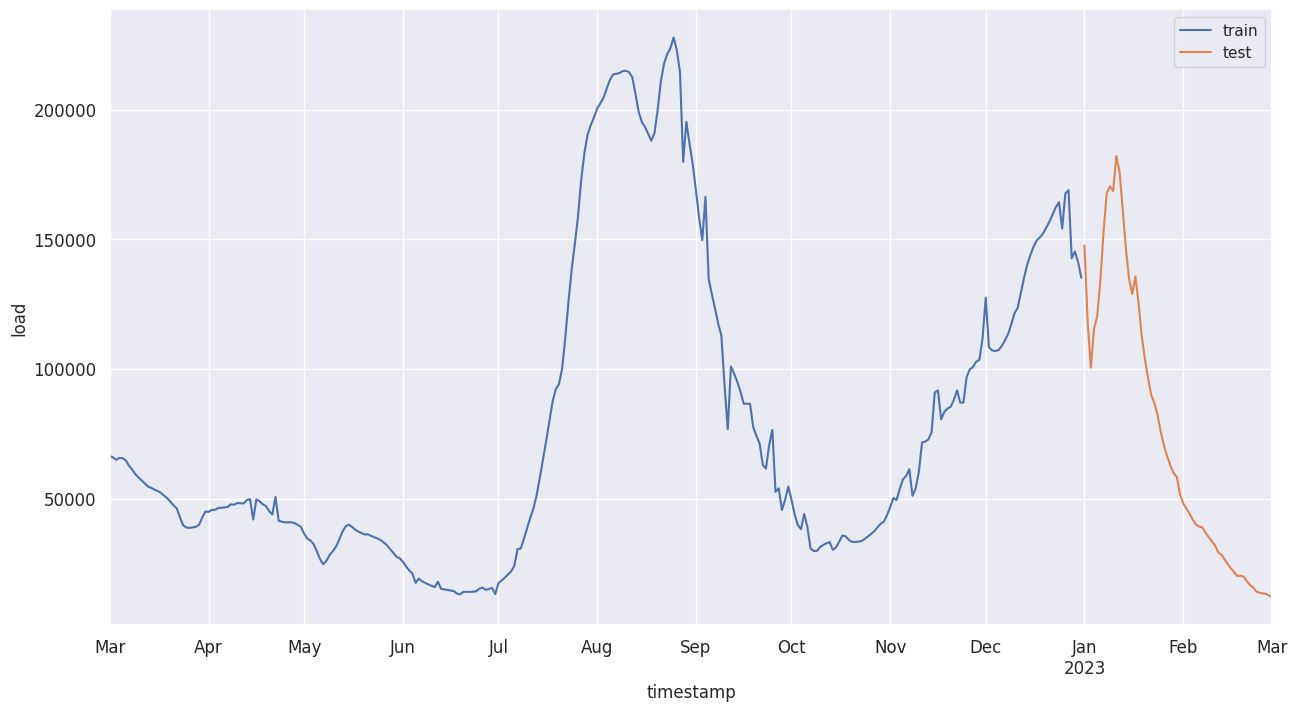

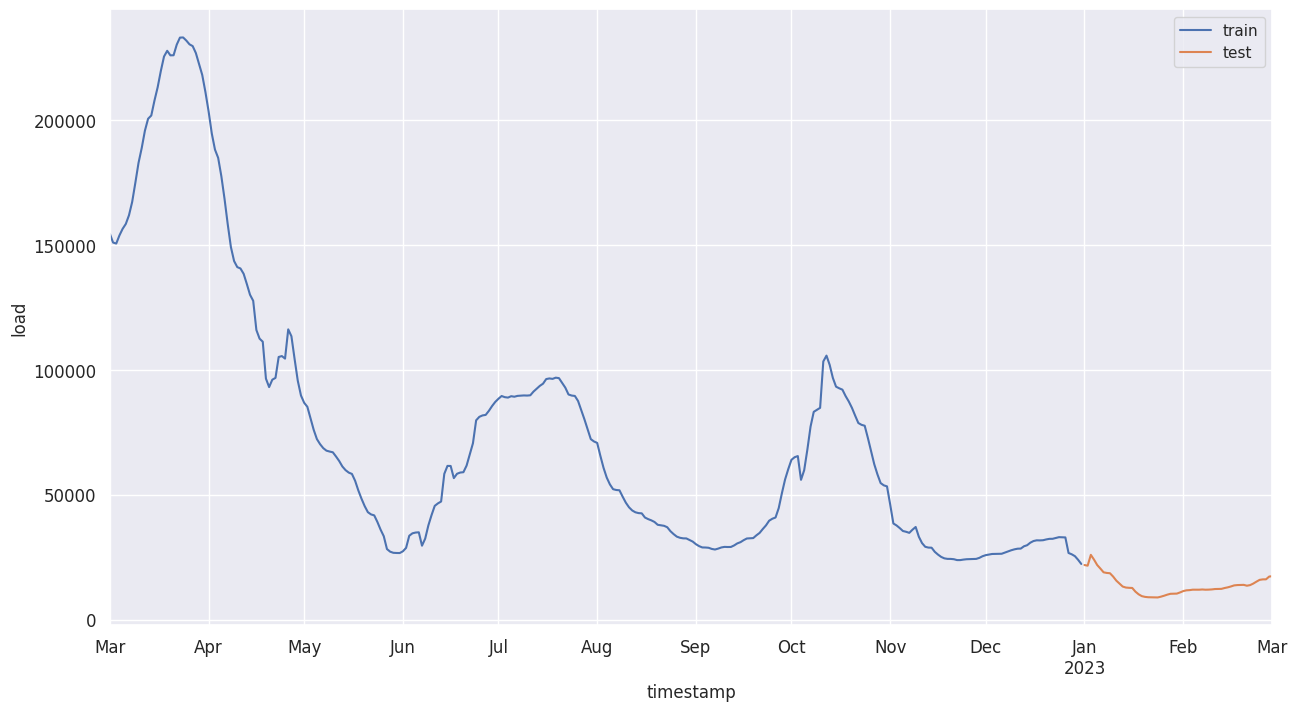

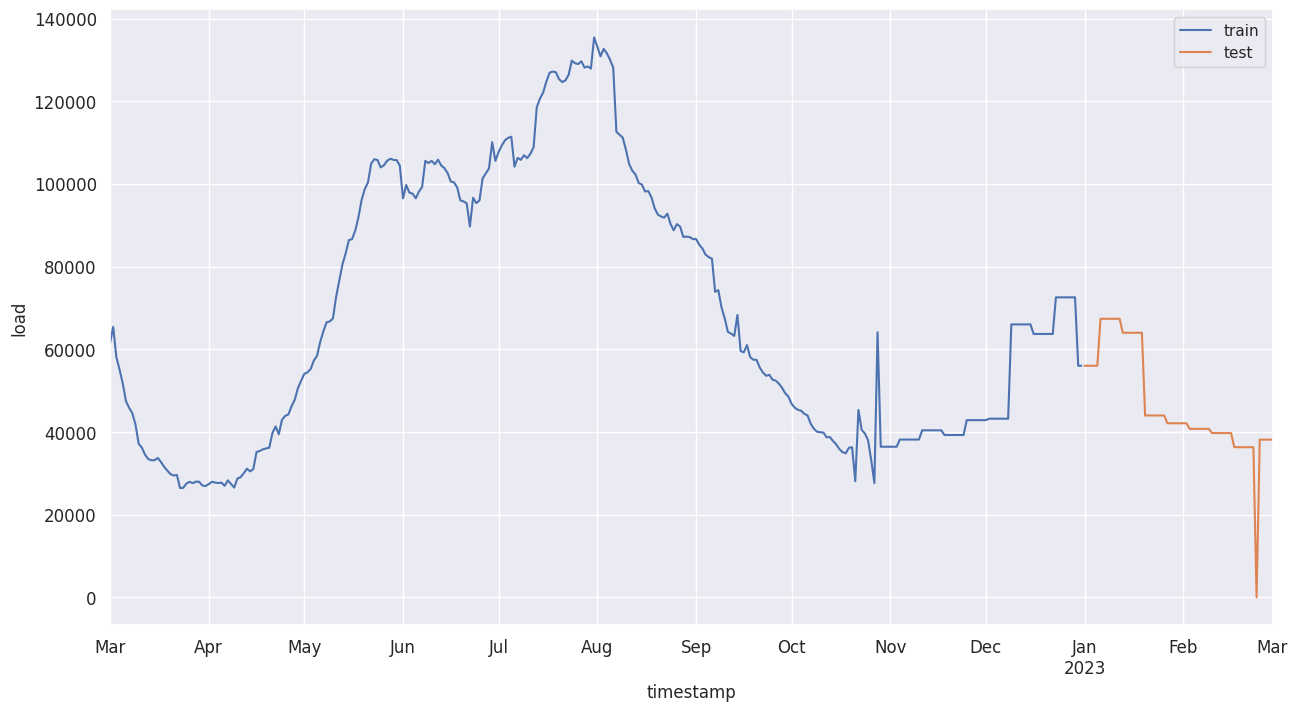

None

None

None

In [ ]:
display(visualize(df1_Japan),visualize(df1_Germany),visualize(df1_USA))

### prepare training and testing data


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
train = df1_Japan.copy()[(df1_Japan.index >= train_start_dt) & (df1_Japan.index < test_start_dt)][['7day_rolling_avg_daily']]
test = df1_Japan.copy()[test_start_dt:end_start_dt][['7day_rolling_avg_daily']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)



Training data shape:  (306, 1)
Test data shape:  (60, 1)


In [ ]:
# scale the training and testing data
scaler = MinMaxScaler()
train['7day_rolling_avg_daily'] = scaler.fit_transform(train)
test['7day_rolling_avg_daily'] = scaler.transform(test)

In [ ]:
train_data = train.values
test_data = test.values

In [ ]:
timesteps=5
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(302, 5)

In [ ]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(56, 5)

In [ ]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print('Training data shape (x,y): ', x_train.shape, y_train.shape)
print('Test data shap (x,y): ', x_test.shape, y_test.shape)

Training data shape (x,y):  (302, 4) (302, 1)
Test data shap (x,y):  (56, 4) (56, 1)


In [ ]:
x_train

array([[0.24860546, 0.24559222, 0.24144154, 0.24496763],
       [0.24559222, 0.24144154, 0.24496763, 0.24439358],
       [0.24144154, 0.24496763, 0.24439358, 0.24030875],
       ...,
       [0.65687264, 0.71975088, 0.72592103, 0.60327957],
       [0.71975088, 0.72592103, 0.60327957, 0.61573629],
       [0.72592103, 0.60327957, 0.61573629, 0.596554  ]])

# Import SVR

## Japan scenerio

## build the model

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100]}  # List of C values to try

# Perform grid search
grid_search_SVM_J = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_SVM_J.fit(x_train, y_train)  # X is your feature matrix, y is your target variable

# Get the best C value and associated score
best_C_SVM_J = grid_search_SVM_J.best_params_['C']
best_score_SVM_J = -grid_search_SVM_J.best_score_

print("Best C:", best_C_SVM_J)
print("Best MSE Score:", best_C_SVM_J)

Best C: 1
Best MSE Score: 1


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: Dat

In [ ]:
results_SVM_J = grid_search_SVM_J.cv_results_
for c, mse in zip(results_SVM_J['params'], -results_SVM_J['mean_test_score']):
    print("C:", c['C'], "MSE:", mse)

C: 0.1 MSE: 0.030036577629994943
C: 1 MSE: 0.02721760577136309
C: 10 MSE: 0.02721760577136309
C: 100 MSE: 0.02721760577136309


In [ ]:
model_Japan = SVR(kernel='rbf',gamma=0.5, C=100, epsilon = 0.05)

In [ ]:
model_Japan.fit(x_train, y_train[:,0])

SVR(C=100, epsilon=0.05, gamma=0.5)

In [ ]:
# df_Japan_SVM.head()

In [ ]:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# Make model predictions
y_train_pred = model_Japan.predict(x_train).reshape(-1,1)
y_test_pred = model_Japan.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(302, 1) (56, 1)


In [ ]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

302 56
302 56


In [ ]:
train_timestamps = df1_Japan[(df1_Japan.index < test_start_dt) & (df1_Japan.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = df1_Japan[test_start_dt:end_start_dt].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))



302 56


In [ ]:
y_test.shape

(56, 1)

### Model evaluation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [ ]:
def mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Args:
        y_true (array): Actual values of the target variable.
        y_pred (array): Predicted values from the model.

    Returns:
        float: MAPE value.
    """

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('MSE for testing data: ', mean_squared_error(y_test,y_test_pred))
print('MAPE for training data', mape(y_test,y_test_pred))
print('MAE for testing data: ', mean_absolute_error( y_test, y_test_pred))
print('R squred is : ', r2_score(y_test, y_test_pred))

MSE for testing data:  60469385.42692405
MAPE for training data 9.707982771614938
MAE for testing data:  5033.046679128682
R squred is :  0.9786743494165159


In [ ]:
mape(y_train,y_train_pred)

9.006407044191956

In [ ]:
print('MSE for training data: ', mean_squared_error(y_train,y_train_pred))

print('MAPE for training data', mape(y_train,y_train_pred))
print('MAE for training data: ', mean_absolute_error( y_train, y_train_pred))
print('R squred is : ', r2_score(y_train,y_train_pred))

MSE for training data:  37987751.0932898
MAPE for training data 9.006407044191956
MAE for training data:  4508.112064182727
R squred is :  0.9894109030105674


In [ ]:
# SSE = []
# k_range = np.arange(1,100,2)     # 1,3,5..,99

# for k in k_range:
#     model = KMeans(n_clusters = k, random_state = 0).fit(X_scaled)
#     SSE.append(model.inertia_)

# SSE

## Germany


### prepare the Germany data

In [ ]:
train_2 = df1_Germany.copy()[(df1_Germany.index >= train_start_dt) & (df1_Germany.index < test_start_dt)][['7day_rolling_avg_daily']]
test_2 = df1_Germany.copy()[test_start_dt:end_start_dt][['7day_rolling_avg_daily']]

print('Training data shape: ', train_2.shape)
print('Test data shape: ', test_2.shape)

Training data shape:  (306, 1)
Test data shape:  (60, 1)


In [ ]:
scaler = MinMaxScaler()
train_2['7day_rolling_avg_daily'] = scaler.fit_transform(train_2)
test_2['7day_rolling_avg_daily'] = scaler.transform(test_2)

In [ ]:
train_data_2 = train_2.values
test_data_2 = test_2.values

In [ ]:
timesteps=5
train_data_2_timesteps=np.array([[j for j in train_data_2[i:i+timesteps]] for i in range(0,len(train_data_2)-timesteps+1)])[:,:,0]
train_data_2_timesteps.shape

(302, 5)

In [ ]:
test_data_2_timesteps=np.array([[j for j in test_data_2[i:i+timesteps]] for i in range(0,len(test_data_2)-timesteps+1)])[:,:,0]
test_data_2_timesteps.shape

(56, 5)

In [ ]:
x_train_2, y_train_2 = train_data_2_timesteps[:,:timesteps-1],train_data_2_timesteps[:,[timesteps-1]]
x_test_2, y_test_2 = test_data_2_timesteps[:,:timesteps-1],test_data_2_timesteps[:,[timesteps-1]]

print(x_train_2.shape, y_train_2.shape)
print(x_test_2.shape, y_test_2.shape)

(302, 4) (302, 1)
(56, 4) (56, 1)


In [ ]:
x_train_2

array([[0.62711553, 0.61042637, 0.60856525, 0.62398814],
       [0.61042637, 0.60856525, 0.62398814, 0.63647604],
       [0.60856525, 0.62398814, 0.63647604, 0.64578913],
       ...,
       [0.05064946, 0.05037778, 0.02085383, 0.0183389 ],
       [0.05037778, 0.02085383, 0.0183389 , 0.01478738],
       [0.02085383, 0.0183389 , 0.01478738, 0.00790657]])

### build the model

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100]}  # List of C values to try

# Perform grid search
grid_search_SVM_G = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_SVM_G.fit(x_train_2, y_train_2)  # X is your feature matrix, y is your target variable

# Get the best C value and associated score
best_C = grid_search_SVM_G.best_params_['C']
best_score = -grid_search_SVM_G.best_score_

print("Best C:", best_C)
print("Best MSE Score:", best_score)

Best C: 1
Best MSE Score: 0.05707427282452128


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: Dat

In [ ]:
results_SMV_G = grid_search_SVM_J.cv_results_
for c, mse in zip(results_SMV_G['params'], -results_SMV_G['mean_test_score']):
    print("C:", c['C'], "MSE:", mse)

C: 0.1 MSE: 0.030036577629994943
C: 1 MSE: 0.02721760577136309
C: 10 MSE: 0.02721760577136309
C: 100 MSE: 0.02721760577136309


In [ ]:
model_2 = SVR(kernel='rbf',gamma=0.5, C=1,epsilon = 0.05)

In [ ]:
model_2.fit(x_train_2, y_train_2[:,0])

SVR(C=1, epsilon=0.05, gamma=0.5)

In [ ]:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# Make model predictions
y_train_2_pred = model_2.predict(x_train_2).reshape(-1,1)
y_test_2_pred = model_2.predict(x_test_2).reshape(-1,1)

print(y_train_2_pred.shape, y_test_2_pred.shape)

(302, 1) (56, 1)


In [ ]:
# Scaling the predictions
y_train_2_pred = scaler.inverse_transform(y_train_2_pred)
y_test_2_pred = scaler.inverse_transform(y_test_2_pred)

print(len(y_train_2_pred), len(y_test_2_pred))
# Scaling the original values
y_train_2 = scaler.inverse_transform(y_train_2)
y_test_2 = scaler.inverse_transform(y_test_2)

print(len(y_train_2), len(y_test_2))

302 56
302 56


In [ ]:
y_train_2_pred_scaled = scaler.fit_transform(y_train_2_pred)
y_test_2_scaled = scaler.fit_transform(y_test_2)
y_train_2_scaled = scaler.fit_transform(y_train_2)
y_test_2_scaled = scaler.fit_transform(y_test_2)


In [ ]:
y_test_2_pred_scaled = scaler.inverse_transform(y_test_2_pred)

In [ ]:
y_train_2_pred_scaled

array([[6.14998483e-01],
       [6.30801684e-01],
       [6.43802068e-01],
       [6.59414587e-01],
       [6.83858196e-01],
       [7.20281421e-01],
       [7.61528359e-01],
       [7.96308704e-01],
       [8.29835073e-01],
       [8.56255241e-01],
       [8.68894265e-01],
       [8.89173551e-01],
       [9.12896451e-01],
       [9.41352112e-01],
       [9.66108819e-01],
       [9.79727207e-01],
       [9.76716839e-01],
       [9.72695899e-01],
       [9.82478499e-01],
       [9.95652652e-01],
       [1.00000000e+00],
       [9.95544978e-01],
       [9.88945304e-01],
       [9.85063599e-01],
       [9.77224223e-01],
       [9.62550861e-01],
       [9.44470574e-01],
       [9.18928941e-01],
       [8.86462701e-01],
       [8.46284686e-01],
       [8.10925238e-01],
       [7.88556561e-01],
       [7.58675052e-01],
       [7.16018486e-01],
       [6.62897876e-01],
       [6.11605921e-01],
       [5.74730363e-01],
       [5.56155612e-01],
       [5.50901074e-01],
       [5.43351497e-01],


In [ ]:
train_timestamps_2 = df1_Germany[(df1_Germany.index < test_start_dt) & (df1_Germany.index >= train_start_dt)].index[timesteps-1:]
test_timestamps_2 = df1_Germany[test_start_dt:end_start_dt].index[timesteps-1:]

print(len(train_timestamps_2), len(test_timestamps_2))

302 56


In [ ]:
train_timestamps_2 = df1_Germany[(df1_Germany.index < test_start_dt) & (df1_Germany.index >= train_start_dt)].index[timesteps-1:]
test_timestamps_2 = df1_Germany[test_start_dt:end_start_dt].index[timesteps-1:]

print(len(train_timestamps_2), len(test_timestamps_2))

302 56


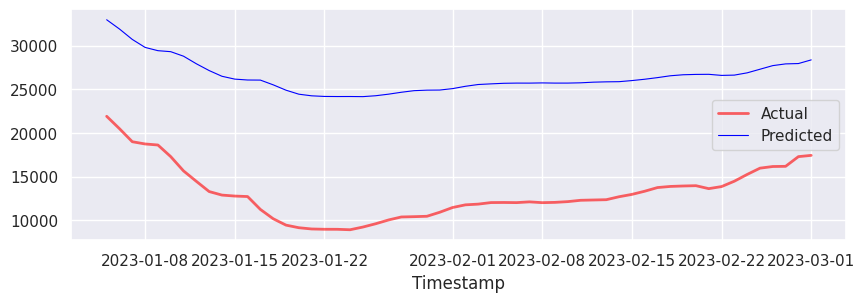

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps_2, y_test_2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps_2, y_test_2_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [ ]:
y_test_2_pred


array([[32962.50998952],
       [31901.57096033],
       [30711.03224826],
       [29796.41544766],
       [29423.20042927],
       [29308.67603919],
       [28790.85310142],
       [27925.11300235],
       [27147.80700592],
       [26493.46186436],
       [26167.9421068 ],
       [26066.66613505],
       [26056.0146739 ],
       [25513.91548879],
       [24900.9933759 ],
       [24442.73566784],
       [24256.75720195],
       [24186.16812638],
       [24174.88465974],
       [24177.43030709],
       [24163.68598123],
       [24266.36084487],
       [24444.88274813],
       [24663.35565111],
       [24847.09273752],
       [24906.26284564],
       [24918.98086658],
       [25079.56305655],
       [25345.4697137 ],
       [25550.17142938],
       [25624.48210504],
       [25690.57044367],
       [25713.08894854],
       [25710.44710388],
       [25734.12561341],
       [25713.16508172],
       [25713.99037668],
       [25745.1701366 ],
       [25818.98868424],
       [25856.64594673],


### model evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test_2,y_test_2_pred))
print('MAPE for testing data', mape(y_test_2,y_test_2_pred))
print('MAE for testing data: ', mean_absolute_error(y_test_2, y_test_2_pred))
print('R squred is : ', r2_score(y_test_2, y_test_2_pred))

MSE for testing data:  178071752.08076745
MAPE for testing data 108.18366929334739
MAE for testing data:  13281.582273309667
R squred is :  -18.32566351050568


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train_2,y_train_2_pred))
print('MAPE for training data: ', mape(y_train_2,y_train_2_pred))
print('MAE for training data: ', mean_absolute_error( y_train_2, y_train_2_pred))
print('R squred is : ', r2_score(y_train_2,y_train_2_pred))

MSE for training data:  38243374.89549239
MAPE for training data:  12.019706089580753
MAE for training data:  5332.557533955863
R squred is :  0.9870633117782072


In [ ]:
y_train_2


array([[156549.28571429],
       [158513.        ],
       [161992.42857143],
       [167324.71428571],
       [175016.57142857],
       [183004.14285714],
       [188930.85714286],
       [195852.28571429],
       [200638.57142857],
       [201936.85714286],
       [207913.14285714],
       [213226.42857143],
       [219777.28571429],
       [225567.42857143],
       [227852.        ],
       [226031.42857143],
       [226067.42857143],
       [230332.85714286],
       [233136.42857143],
       [233200.28571429],
       [231950.71428571],
       [230444.28571429],
       [229735.42857143],
       [226945.        ],
       [222531.85714286],
       [218179.57142857],
       [211331.42857143],
       [203590.57142857],
       [194724.57142857],
       [188285.71428571],
       [184983.71428571],
       [177626.71428571],
       [168565.85714286],
       [158431.71428571],
       [149260.57142857],
       [143657.14285714],
       [141228.85714286],
       [140680.14285714],
       [1385

In [ ]:
y_train_2_pred

array([[151533.83749486],
       [154591.59762309],
       [157107.04078071],
       [160127.90565008],
       [164857.4974336 ],
       [171905.02389768],
       [179885.89029903],
       [186615.53621203],
       [193102.55045783],
       [198214.5864174 ],
       [200660.11004451],
       [204583.94729335],
       [209174.08929112],
       [214679.97251847],
       [219470.14561391],
       [222105.16639218],
       [221522.69044678],
       [220744.67923428],
       [222637.51351248],
       [225186.57920041],
       [226027.74725341],
       [225165.74539771],
       [223888.77507503],
       [223137.70428654],
       [221620.86422656],
       [218781.71663963],
       [215283.36352438],
       [210341.3152528 ],
       [204059.42531546],
       [196285.38456188],
       [189443.68820163],
       [185115.57484163],
       [179333.80423388],
       [171080.18905052],
       [160801.88686917],
       [150877.4110276 ],
       [143742.3626145 ],
       [140148.33566745],
       [1391

In [ ]:
# from sklearn.model_selection import GridSearchCV

# svm_linear = SVC(kernel='linear')

# param_range1 = {'C': [0.00001,0.0001,0.001,0.01, 0.1,5,10,100,1000,2000]}   # 10 C values

# grid1 = GridSearchCV(estimator = svm_linear, param_grid = param_range1, cv =5)

# grid1.fit(x_train_2, y_train_2)

## USA

### Prepare the USA data

In [ ]:
train_3 = df1_USA.copy()[(df1_USA.index >= train_start_dt) & (df1_USA.index < test_start_dt)][['7day_rolling_avg_daily']]
test_3 = df1_USA.copy()[test_start_dt:end_start_dt][['7day_rolling_avg_daily']]

print('Training data shape: ', train_3.shape)
print('Test data shape: ', test_3.shape)

Training data shape:  (306, 1)
Test data shape:  (60, 1)


In [ ]:
scaler = MinMaxScaler()
train_3['7day_rolling_avg_daily'] = scaler.fit_transform(train_3)
test_3['7day_rolling_avg_daily'] = scaler.transform(test_3)

In [ ]:
train_data_3 = train_3.values
test_data_3 = test_3.values

In [ ]:
timesteps=5
train_data_3_timesteps=np.array([[j for j in train_data_3[i:i+timesteps]] for i in range(0,len(train_data_3)-timesteps+1)])[:,:,0]
train_data_3_timesteps.shape

(302, 5)

In [ ]:
test_data_3_timesteps=np.array([[j for j in test_data_3[i:i+timesteps]] for i in range(0,len(test_data_3)-timesteps+1)])[:,:,0]
test_data_3_timesteps.shape

(56, 5)

In [ ]:
x_train_3, y_train_3 = train_data_3_timesteps[:,:timesteps-1],train_data_3_timesteps[:,[timesteps-1]]
x_test_3, y_test_3 = test_data_3_timesteps[:,:timesteps-1],test_data_3_timesteps[:,[timesteps-1]]

print(x_train_3.shape, y_train_3.shape)
print(x_test_3.shape, y_test_3.shape)

(302, 4) (302, 1)
(56, 4) (56, 1)


In [ ]:
# 找到0值的索引
zero_idx = np.where(y_test_3 == 0)[0]
zero_idx

array([], dtype=int64)

In [ ]:

# 用相邻的非零值代替0值
for idx in zero_idx:
    y_test_3[idx] = y_test_3[idx-1] if y_test_3[idx-1] != 0 else y_test_3[idx+1]


In [ ]:
zero_idx_1 = np.where(y_test_3 == 0)[0]
zero_idx_1

array([], dtype=int64)

### build the model

In [ ]:
svr = SVR()

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100]}  # List of C values to try

# Perform grid search
grid_search_SVM_U = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_SVM_U.fit(x_train_3, y_train_3)  # X is your feature matrix, y is your target variable

# Get the best C value and associated score
best_C_SMV_U = grid_search_SVM_U.best_params_['C']
best_score_SVM_U = -grid_search_SVM_U.best_score_

print("Best C:", best_C_SMV_U)
print("Best MSE Score:", best_score_SVM_U )

Best C: 1
Best MSE Score: 0.01823575998137615


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: Dat

In [ ]:
results_SVM_U = grid_search_SVM_U.cv_results_
for c, mse in zip(results_SVM_U['params'], -results_SVM_U['mean_test_score']):
    print("C:", c['C'], "MSE:", mse)

C: 0.1 MSE: 0.020411568061433842
C: 1 MSE: 0.01823575998137615
C: 10 MSE: 0.02087146311495275
C: 100 MSE: 0.025041802585339272


In [ ]:
model_3 = SVR(kernel='rbf',gamma=0.5, C= best_C_SMV_U,epsilon = 0.05)

In [ ]:
model_3.fit(x_train_3, y_train_3[:,0])

SVR(C=1, epsilon=0.05, gamma=0.5)

In [ ]:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# Make model predictions
y_train_3_pred = model_3.predict(x_train_3).reshape(-1,1)
y_test_3_pred = model_3.predict(x_test_3).reshape(-1,1)

print(y_train_3_pred.shape, y_test_3_pred.shape)

(302, 1) (56, 1)


In [ ]:
# Scaling the predictions
y_train_3_pred = scaler.inverse_transform(y_train_3_pred)
y_test_3_pred = scaler.inverse_transform(y_test_3_pred)

print(len(y_train_3_pred), len(y_test_3_pred))
# Scaling the original values
y_train_3 = scaler.inverse_transform(y_train_3)
y_test_3 = scaler.inverse_transform(y_test_3)

print(len(y_train_3), len(y_test_3))

302 56
302 56


In [ ]:
x_train_3

array([[0.32107375, 0.35755228, 0.29042281, 0.2630508 ],
       [0.35755228, 0.29042281, 0.2630508 , 0.2323199 ],
       [0.29042281, 0.2630508 , 0.2323199 , 0.19308555],
       ...,
       [0.42317404, 0.42317404, 0.42317404, 0.42317404],
       [0.42317404, 0.42317404, 0.42317404, 0.42317404],
       [0.42317404, 0.42317404, 0.42317404, 0.2713471 ]])

In [ ]:
train_timestamps_3 = df1_USA[(df1_USA.index < test_start_dt) & (df1_USA.index >= train_start_dt)].index[timesteps-1:]
test_timestamps_3 = df1_USA[test_start_dt:end_start_dt].index[timesteps-1:]

print(len(train_timestamps_3), len(test_timestamps_3))

302 56


In [ ]:
y_train_3_pred

array([[ 56680.91480306],
       [ 52931.82070494],
       [ 49072.36935592],
       [ 46578.23097598],
       [ 44708.81509161],
       [ 42681.62937398],
       [ 39692.64865095],
       [ 37897.83636162],
       [ 36197.3672048 ],
       [ 35197.35248859],
       [ 34624.66167916],
       [ 34400.64395627],
       [ 34553.40823012],
       [ 34266.09827454],
       [ 33717.61835569],
       [ 33047.72463877],
       [ 32410.28960513],
       [ 32021.93196845],
       [ 31898.46505792],
       [ 30756.55777989],
       [ 30335.88696609],
       [ 30313.03142771],
       [ 30590.48994031],
       [ 30664.80160224],
       [ 30799.09710149],
       [ 30800.46617193],
       [ 30526.40949778],
       [ 30360.00387612],
       [ 30384.59497763],
       [ 30626.04028434],
       [ 30696.03273447],
       [ 30698.31697221],
       [ 30698.75017324],
       [ 30432.04669383],
       [ 30788.3912426 ],
       [ 30590.17855036],
       [ 30325.38176642],
       [ 30841.04695523],
       [ 311

In [ ]:
y_train_3

array([[ 51776.42857143],
       [ 47501.28571429],
       [ 45877.        ],
       [ 44558.71428571],
       [ 41850.14285714],
       [ 37186.28571429],
       [ 36232.85714286],
       [ 34515.14285714],
       [ 33476.        ],
       [ 33171.28571429],
       [ 33197.71428571],
       [ 33725.14285714],
       [ 32771.28571429],
       [ 31588.14285714],
       [ 30668.28571429],
       [ 29820.        ],
       [ 29494.57142857],
       [ 29624.85714286],
       [ 26461.85714286],
       [ 26501.28571429],
       [ 27548.71428571],
       [ 27965.57142857],
       [ 27638.42857143],
       [ 28014.14285714],
       [ 27973.42857143],
       [ 27059.        ],
       [ 26960.        ],
       [ 27399.85714286],
       [ 27969.28571429],
       [ 27780.57142857],
       [ 27661.42857143],
       [ 27775.        ],
       [ 26989.71428571],
       [ 28317.71428571],
       [ 27463.        ],
       [ 26569.14285714],
       [ 28741.71428571],
       [ 29081.14285714],
       [ 300

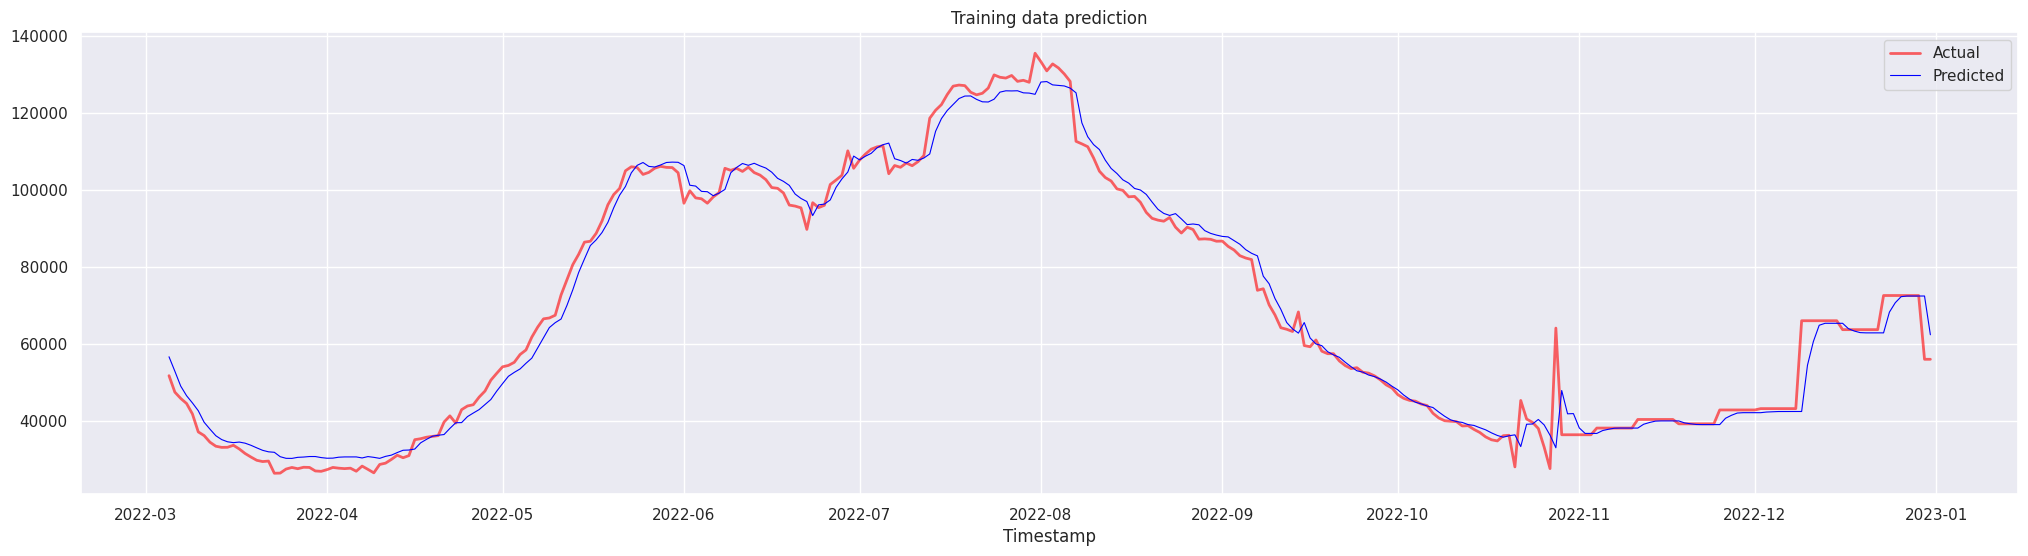

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps_3, y_train_3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps_3, y_train_3_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

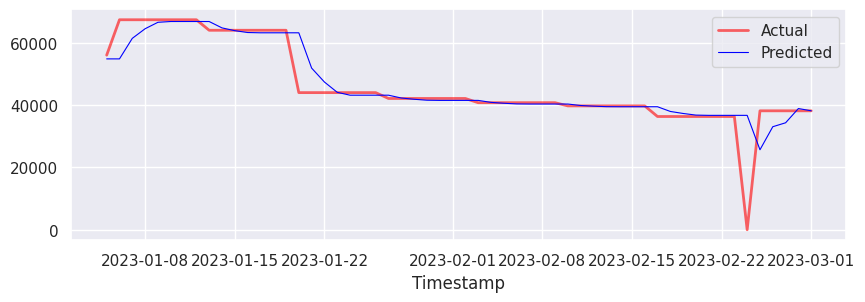

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps_3, y_test_3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps_3, y_test_3_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

### model evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test_3,y_test_3_pred))

print('MAE for testing data: ', mean_absolute_error( y_test_3, y_test_3_pred))
print('R squred is : ', r2_score(y_test_3, y_test_3_pred))

MSE for testing data:  39708132.69501298
MAE for testing data:  2493.778024370876
R squred is :  0.7594963936134129


In [ ]:
print('MAPE for testing data', mape(y_test_3,y_test_3_pred))

MAPE for testing data 6555248450290.502


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train_3,y_train_3_pred))
print('MAE for training data: ', mean_absolute_error( y_train_3, y_train_3_pred))
print('R squred is : ', r2_score(y_train_3,y_train_3_pred))

MSE for training data:  17546945.73021595
MAE for training data:  2748.6604191427805
R squred is :  0.9829393291194409


In [ ]:
print('MAPE for training data', mape(y_train_3, y_train_3_pred))

MAPE for training data 4.740443263725078


## a fucking table

```

```



In [ ]:
df1_Germany_SVM_train = df1_Germany.copy()[(df1_Germany.index >= train_start_dt) & (df1_Germany.index < caonima_end_dt)]
df1_USA_SVM_train = df1_USA.copy()[(df1_USA.index >= train_start_dt) & (df1_USA.index < caonima_end_dt)]
df1_Japan_SVM_train = df1_Japan.copy()[(df1_Japan.index >= train_start_dt) & (df1_Japan.index < caonima_end_dt)]

In [ ]:
SVM ={"Japan_Train_Actual":y_train[:,0],
    "Japan_Train_Predictions": y_train_pred[:,0],
    "Germany_Train_Actual":y_train_2[:,0],
    "Germany_Train_Predictions": y_train_2_pred[:,0],
    "USA_Train_Actual":y_train_3[:,0],
    "USA_Train_Predictions": y_train_3_pred[:,0],




      }

df_SVM = pd.DataFrame(SVM)
df_SVM.index = df1_Japan_SVM_train.index





In [ ]:
df_SVM = df_SVM.round().astype(int)
df_SVM

,Japan_Train_Actual,Japan_Train_Predictions,Germany_Train_Actual,Germany_Train_Predictions,USA_Train_Actual,USA_Train_Predictions
date,,,,,,
2022-03-01,65558,65903,156549,151534,51776,56681
2022-03-02,64680,65473,158513,154592,47501,52932
2022-03-03,62702,64677,161992,157107,45877,49072
2022-03-04,61174,62433,167325,160128,44559,46578
2022-03-05,59398,60979,175017,164857,41850,44709
...,...,...,...,...,...,...
2022-12-23,168974,162283,26742,38691,72573,72442
2022-12-24,142634,165390,26212,35856,72573,72442
2022-12-25,145310,152234,25463,34365,72573,72442


In [ ]:
df1_Germany_SVM_test = df1_Germany.copy()[caonimabi_end_dt:end_start_dt]

In [ ]:
SVM_test={"Japan_Actual":y_test[:,0],
    "Japan_Predictions": y_test_pred[:,0],
    "Germany_Actual":y_test_2[:,0],
    "Germany_Predictions": y_test_2_pred[:,0],
    "USA_Actual":y_test_3[:,0],
    "USA_Predictions": y_test_3_pred[:,0],




      }

df_SVM_test = pd.DataFrame(SVM_test)
df_SVM_test.index = df1_Germany_SVM_test.index

In [ ]:
df_SVM_test = df_SVM.round().astype(int)
df_SVM_test.head()

,Japan_Train_Actual,Japan_Train_Predictions,Germany_Train_Actual,Germany_Train_Predictions,USA_Train_Actual,USA_Train_Predictions
date,,,,,,
2022-03-01,65558,65903,156549,151534,51776,56681
2022-03-02,64680,65473,158513,154592,47501,52932
2022-03-03,62702,64677,161992,157107,45877,49072
2022-03-04,61174,62433,167325,160128,44559,46578
2022-03-05,59398,60979,175017,164857,41850,44709


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_SVM_test.to_excel('/content/drive/MyDrive/FYP/FYP.xlsx', sheet_name = 'New_sheet_2')

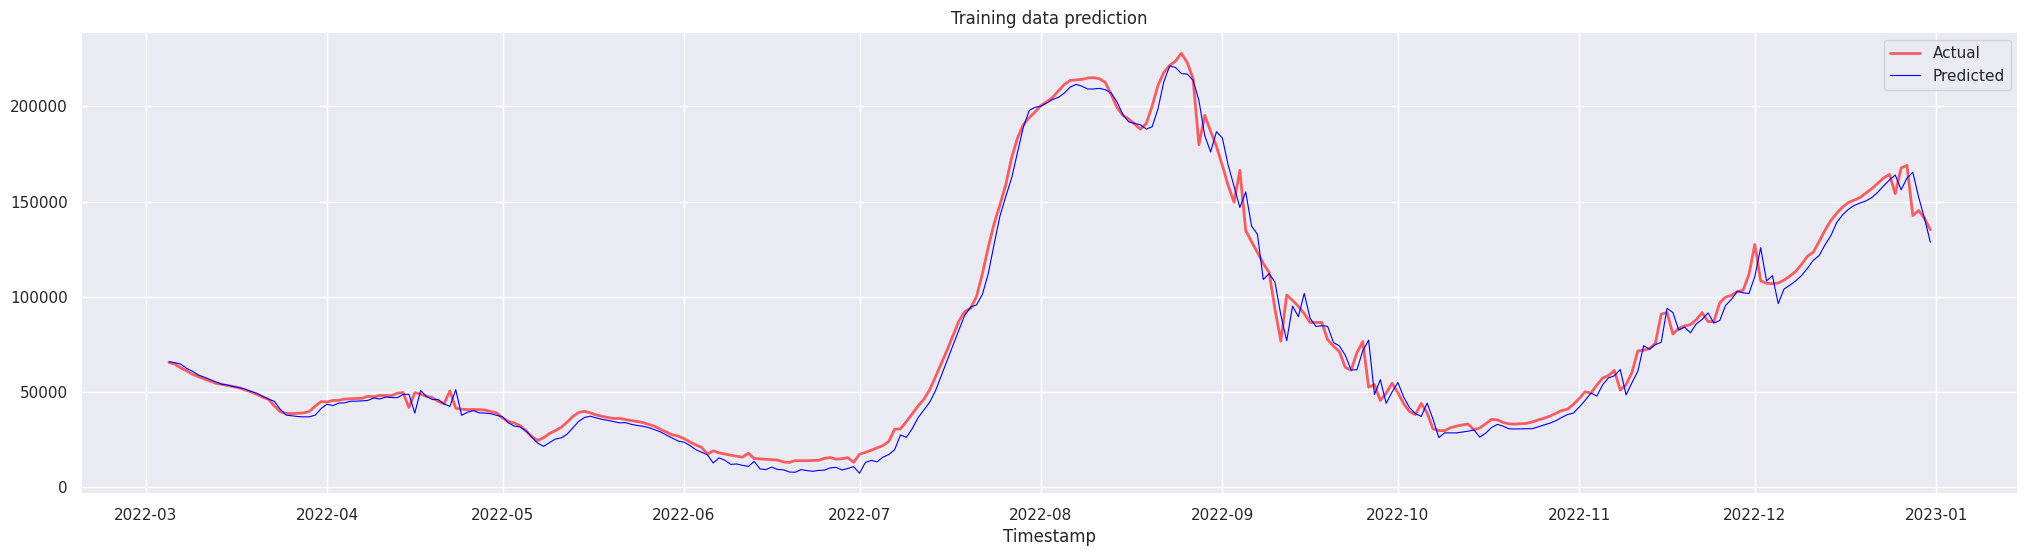

In [ ]:
# Plot the predictions for training data:

plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

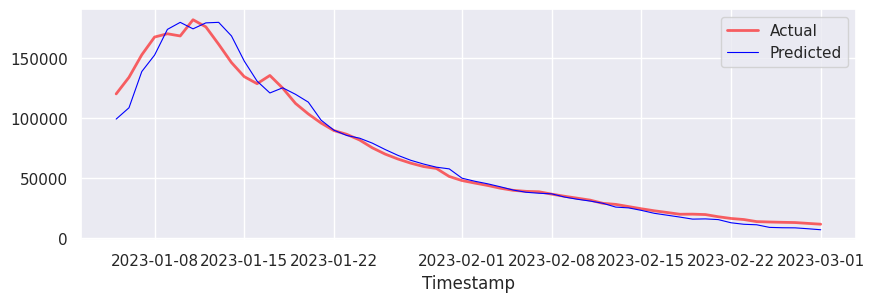

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [ ]:
# model_2 = SVR(kernel='rbf',gamma=0.5, C=1,epsilon = 0.05)

In [ ]:
# model_2.fit(x_train_2, y_train_2[:,0])

In [ ]:
# SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
#     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# # Make model predictions
# y_train_2_pred = model_2.predict(x_train_2).reshape(-1,1)
# y_test_2_pred = model_2.predict(x_test_2).reshape(-1,1)

# print(y_train_2_pred.shape, y_test_2_pred.shape)

In [ ]:
# # Scaling the predictions
# y_train_2_pred = scaler.inverse_transform(y_train_2_pred)
# y_test_2_pred = scaler.inverse_transform(y_test_2_pred)

# print(len(y_train_2_pred), len(y_test_2_pred))
# # Scaling the original values
# y_train_2 = scaler.inverse_transform(y_train_2)
# y_test_2 = scaler.inverse_transform(y_test_2)

# print(len(y_train_2), len(y_test_2))

In [ ]:
y_train_2

array([[156549.28571429],
       [158513.        ],
       [161992.42857143],
       [167324.71428571],
       [175016.57142857],
       [183004.14285714],
       [188930.85714286],
       [195852.28571429],
       [200638.57142857],
       [201936.85714286],
       [207913.14285714],
       [213226.42857143],
       [219777.28571429],
       [225567.42857143],
       [227852.        ],
       [226031.42857143],
       [226067.42857143],
       [230332.85714286],
       [233136.42857143],
       [233200.28571429],
       [231950.71428571],
       [230444.28571429],
       [229735.42857143],
       [226945.        ],
       [222531.85714286],
       [218179.57142857],
       [211331.42857143],
       [203590.57142857],
       [194724.57142857],
       [188285.71428571],
       [184983.71428571],
       [177626.71428571],
       [168565.85714286],
       [158431.71428571],
       [149260.57142857],
       [143657.14285714],
       [141228.85714286],
       [140680.14285714],
       [1385

In [ ]:
train_timestamps_2 = df1_Germany[(df1_Germany.index < test_start_dt) & (df1_Germany.index >= train_start_dt)].index[timesteps-1:]
test_timestamps_2 = df1_Germany[test_start_dt:end_start_dt].index[timesteps-1:]

print(len(train_timestamps_2), len(test_timestamps_2))

302 56


In [ ]:
# plt.figure(figsize=(25,6))
# plt.plot(train_timestamps_2, y_train_2, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(train_timestamps_2, y_train_2_pred, color = 'blue', linewidth=0.8)
# plt.legend(['Actual','Predicted'])
# plt.xlabel('Timestamp')
# plt.title("Training data prediction")
# plt.show()

In [ ]:
# y_train_2_pred,

In [ ]:
# plt.figure(figsize=(10,3))
# plt.plot(test_timestamps_2, y_test_2, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(test_timestamps_2, y_test_2_pred, color = 'blue', linewidth=0.8)
# plt.legend(['Actual','Predicted'])
# plt.xlabel('Timestamp')
# plt.show()

#import MLP

##Japan scenerio
*italicized text*

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [ ]:
# Define your MLP model
mlp = MLPRegressor()

# Define the parameter grid for grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # List of alpha values to try

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)  # X is your feature matrix, y is your target variable

# Get the best alpha value and corresponding MSE score
best_alpha_MLP_J = grid_search.best_params_['alpha']
best_mse_MLP_J = -grid_search.best_score_
print("Best alpha:", best_alpha_MLP_J)
print("Best MSE Score:", best_mse_MLP_J)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multila

Best alpha: 0.001
Best MSE Score: 9840615056.70754


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
model_MLP_J =  MLPRegressor(hidden_layer_sizes=(900,7), activation='relu',
             solver='adam',alpha=best_alpha_MLP_J,
             batch_size=13, learning_rate='constant',learning_rate_init=0.001,
             max_iter=1000, shuffle=True,random_state=5, tol=0.001,
             early_stopping=True,
             verbose=True,
             validation_fraction=0.2
             )

In [ ]:
y_train[:,0]

array([ 65557.71428571,  64680.42857143,  62701.85714286,  61173.71428571,
        59398.42857143,  58138.        ,  56976.14285714,  55781.42857143,
        54611.14285714,  54123.28571429,  53447.71428571,  52909.57142857,
        52220.28571429,  51123.42857143,  50162.85714286,  48792.14285714,
        47384.85714286,  46221.28571429,  42760.        ,  39714.71428571,
        38845.57142857,  38700.14285714,  38887.85714286,  39089.85714286,
        39834.85714286,  42699.57142857,  45008.14285714,  44863.        ,
        45622.42857143,  45669.57142857,  46338.14285714,  46469.28571429,
        46589.57142857,  46786.28571429,  47785.85714286,  47580.14285714,
        48263.71428571,  48211.        ,  48111.28571429,  49399.28571429,
        49765.28571429,  41901.85714286,  49688.28571429,  48952.14285714,
        47812.57142857,  47119.14285714,  45162.        ,  43841.42857143,
        50614.14285714,  41499.71428571,  41030.        ,  40823.        ,
        40853.42857143,  

In [ ]:
model_MLP_J.fit(x_train, y_train[:,0])

Iteration 1, loss = 4773820472.09333992
Validation score: -1.830702
Iteration 2, loss = 4773755005.80943584
Validation score: -1.830650
Iteration 3, loss = 4773618573.78893757
Validation score: -1.830533
Iteration 4, loss = 4773344550.04857635
Validation score: -1.830325
Iteration 5, loss = 4772904725.05115604
Validation score: -1.829983
Iteration 6, loss = 4772228106.25257683
Validation score: -1.829503
Iteration 7, loss = 4771262677.25605297
Validation score: -1.828815
Iteration 8, loss = 4769864237.85944653
Validation score: -1.827892
Iteration 9, loss = 4768069096.49456406
Validation score: -1.826629
Iteration 10, loss = 4765659956.60808945
Validation score: -1.825091
Iteration 11, loss = 4762702810.96745205
Validation score: -1.823155
Iteration 12, loss = 4759080918.35977459
Validation score: -1.820733
Iteration 13, loss = 4754615397.75526333
Validation score: -1.817914
Iteration 14, loss = 4749436156.13962936
Validation score: -1.814535
Iteration 15, loss = 4743232241.72889900
Va

MLPRegressor(alpha=0.001, batch_size=13, early_stopping=True,
             hidden_layer_sizes=(900, 7), max_iter=1000, random_state=5,
             tol=0.001, validation_fraction=0.2, verbose=True)

In [ ]:
# Make model predictions
y_train_MLP_pred = model_MLP_J.predict(x_train).reshape(-1,1)
y_test_MLP_pred = model_MLP_J.predict(x_test).reshape(-1,1)

print(y_train_MLP_pred.shape, y_test_MLP_pred.shape)

(302, 1) (56, 1)


In [ ]:
# # Scaling the predictions
# y_train_MLP_pred = scaler.inverse_transform(y_train_MLP_pred)
# y_test_MLP_pred = scaler.inverse_transform(y_test_MLP_pred)

# print(len(y_train_MLP_pred), len(y_test_MLP_pred))
# # Scaling the original values
# y_train = scaler.inverse_transform(y_train)
# y_test = scaler.inverse_transform(y_test)

# print(len(y_train), len(y_test))

In [ ]:
y_train

array([[ 65557.71428571],
       [ 64680.42857143],
       [ 62701.85714286],
       [ 61173.71428571],
       [ 59398.42857143],
       [ 58138.        ],
       [ 56976.14285714],
       [ 55781.42857143],
       [ 54611.14285714],
       [ 54123.28571429],
       [ 53447.71428571],
       [ 52909.57142857],
       [ 52220.28571429],
       [ 51123.42857143],
       [ 50162.85714286],
       [ 48792.14285714],
       [ 47384.85714286],
       [ 46221.28571429],
       [ 42760.        ],
       [ 39714.71428571],
       [ 38845.57142857],
       [ 38700.14285714],
       [ 38887.85714286],
       [ 39089.85714286],
       [ 39834.85714286],
       [ 42699.57142857],
       [ 45008.14285714],
       [ 44863.        ],
       [ 45622.42857143],
       [ 45669.57142857],
       [ 46338.14285714],
       [ 46469.28571429],
       [ 46589.57142857],
       [ 46786.28571429],
       [ 47785.85714286],
       [ 47580.14285714],
       [ 48263.71428571],
       [ 48211.        ],
       [ 481

In [ ]:
y_train_MLP_pred

array([[ 75076.15488534],
       [ 74907.16910931],
       [ 74694.67220733],
       [ 74275.74047451],
       [ 73429.36569367],
       [ 72273.83719313],
       [ 71047.95005038],
       [ 69974.8651052 ],
       [ 68964.55099304],
       [ 68067.1711721 ],
       [ 67315.05552971],
       [ 66654.09118889],
       [ 66116.31103742],
       [ 65667.92619811],
       [ 65105.22921454],
       [ 64489.00549338],
       [ 63716.52669816],
       [ 62809.76560698],
       [ 61890.52107769],
       [ 60501.13374405],
       [ 58797.85531573],
       [ 57196.81769451],
       [ 55789.80152196],
       [ 55066.9493078 ],
       [ 54950.83376129],
       [ 55137.052032  ],
       [ 55888.96591948],
       [ 57038.37274587],
       [ 58120.32879542],
       [ 59203.21941994],
       [ 59757.87664585],
       [ 60007.922325  ],
       [ 60308.5075182 ],
       [ 60489.92403648],
       [ 60698.79524369],
       [ 60970.87484784],
       [ 61179.00659657],
       [ 61493.22323283],
       [ 617

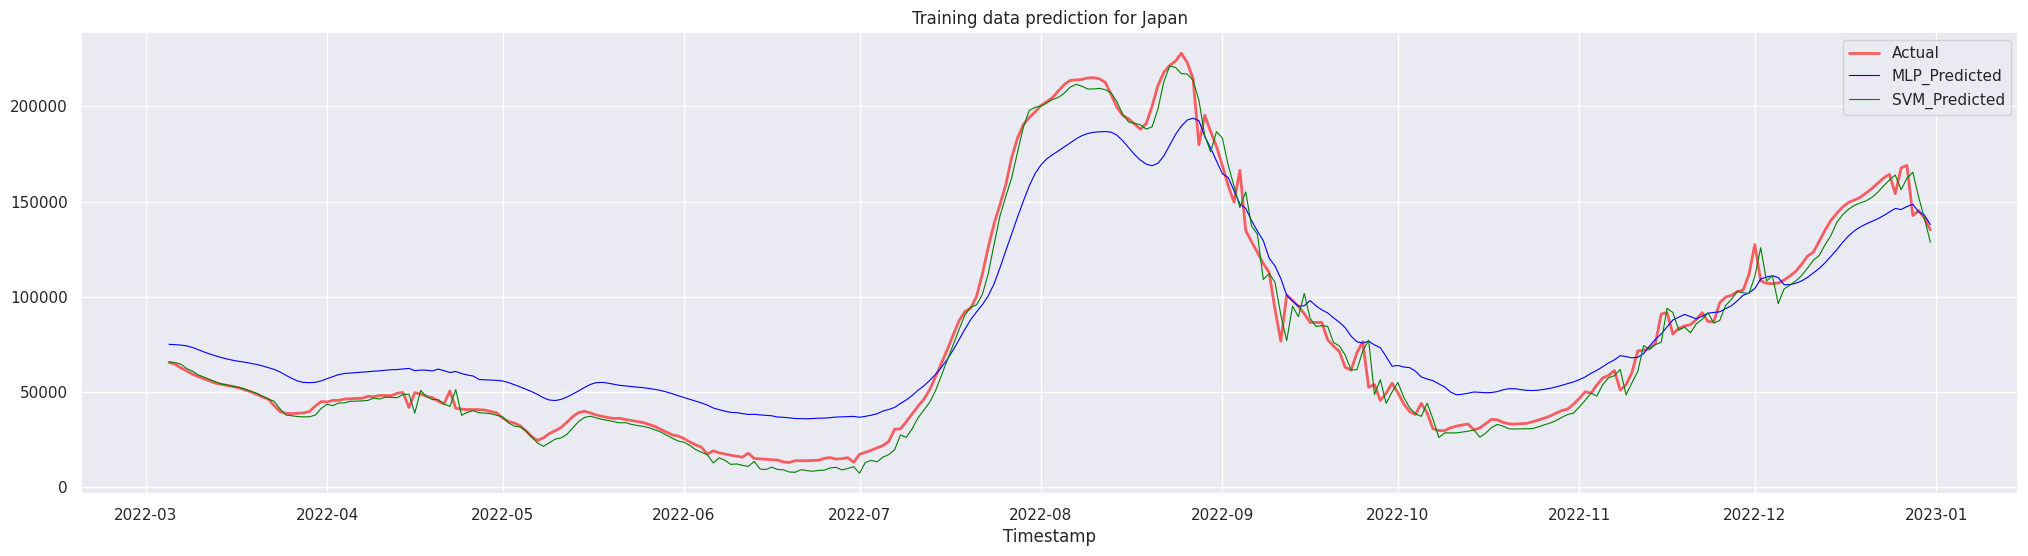

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_MLP_pred, color = 'blue', linewidth=0.8)
plt.plot(train_timestamps, y_train_pred, color = 'green', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction for Japan")
plt.show()

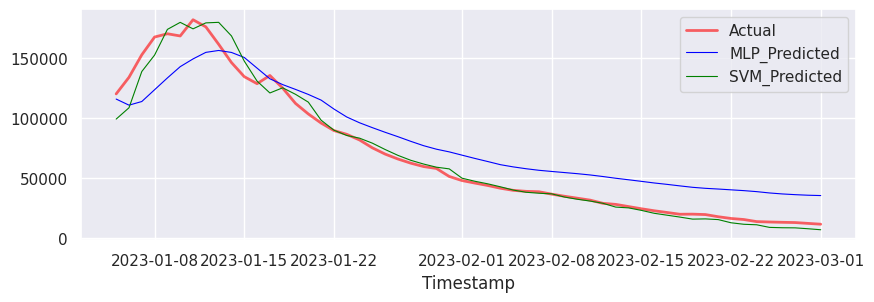

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_MLP_pred, color = 'blue', linewidth=0.8)
plt.plot(test_timestamps, y_test_pred, color = 'green', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted'])
plt.xlabel('Timestamp')
plt.show()

### model evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test,y_test_MLP_pred))

print('MAE for testing data: ', mean_absolute_error( y_test, y_test_MLP_pred))
print('R squred is : ', r2_score(y_test, y_test_MLP_pred))

MSE for testing data:  461545339.3927817
MAE for testing data:  20168.395686201435
R squred is :  0.8372274735912306


In [ ]:
print('MAPE for testing data: ', mape(y_test, y_test_MLP_pred))

MAPE for testing data:  61.20104274480684


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train,y_train_MLP_pred))
print('MAE for training data: ', mean_absolute_error( y_train, y_train_MLP_pred))
print('R squred is : ', r2_score(y_train,y_train_MLP_pred))

MSE for training data:  334187156.9120921
MAE for training data:  16218.258284817925
R squred is :  0.9068452299670366


In [ ]:
print('MAPE for testing data: ', mape( y_train, y_train_MLP_pred))

MAPE for testing data:  39.037768298244806


##Germany Scenerio

In [ ]:
# Define your MLP model
mlp = MLPRegressor()

# Define the parameter grid for grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # List of alpha values to try

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_2, y_train_2)  # X is your feature matrix, y is your target variable

# Get the best alpha value and corresponding MSE score
best_alpha_MLP_G = grid_search.best_params_['alpha']
best_mse_MLP_G = -grid_search.best_score_
print("Best alpha:", best_alpha_MLP_G)
print("Best MSE Score:", best_mse_MLP_G)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multila

Best alpha: 10
Best MSE Score: 8320464484.682111


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
model_MLP_2 =  MLPRegressor(hidden_layer_sizes=(900,7), activation='relu',
             solver='adam',alpha=best_alpha_MLP_G,
             batch_size=13, learning_rate='constant',learning_rate_init=0.001,
             max_iter=1000, shuffle=True,random_state=5, tol=0.001,
             early_stopping=True,
             verbose=True,
             validation_fraction=0.2
             )

In [ ]:
model_MLP_2.fit(x_train_2, y_train_2[:,0])

Iteration 1, loss = 4412311559.99662876
Validation score: -1.943064
Iteration 2, loss = 4412250625.41406155
Validation score: -1.943005
Iteration 3, loss = 4412131929.73121357
Validation score: -1.942879
Iteration 4, loss = 4411888497.87072754
Validation score: -1.942654
Iteration 5, loss = 4411475697.07967854
Validation score: -1.942292
Iteration 6, loss = 4410842358.45787239
Validation score: -1.941751
Iteration 7, loss = 4409884278.32732391
Validation score: -1.941011
Iteration 8, loss = 4408664368.12509823
Validation score: -1.939970
Iteration 9, loss = 4407052507.55590439
Validation score: -1.938654
Iteration 10, loss = 4404888431.47817326
Validation score: -1.936982
Iteration 11, loss = 4402201305.82902050
Validation score: -1.934898
Iteration 12, loss = 4398914648.67165375
Validation score: -1.932352
Iteration 13, loss = 4395017830.08084679
Validation score: -1.929304
Iteration 14, loss = 4390172960.41375732
Validation score: -1.925901
Iteration 15, loss = 4384684374.42917633
Va

MLPRegressor(alpha=10, batch_size=13, early_stopping=True,
             hidden_layer_sizes=(900, 7), max_iter=1000, random_state=5,
             tol=0.001, validation_fraction=0.2, verbose=True)

In [ ]:
x_train_2

array([[0.62711553, 0.61042637, 0.60856525, 0.62398814],
       [0.61042637, 0.60856525, 0.62398814, 0.63647604],
       [0.60856525, 0.62398814, 0.63647604, 0.64578913],
       ...,
       [0.05064946, 0.05037778, 0.02085383, 0.0183389 ],
       [0.05037778, 0.02085383, 0.0183389 , 0.01478738],
       [0.02085383, 0.0183389 , 0.01478738, 0.00790657]])

In [ ]:
# Make model predictions
y_train_MLP_2_pred = model_MLP_2.predict(x_train_2).reshape(-1,1)
y_test_MLP_2_pred = model_MLP_2.predict(x_test_2).reshape(-1,1)

print(y_train_MLP_2_pred.shape, y_test_MLP_2_pred.shape)

(302, 1) (56, 1)


In [ ]:
y_train_MLP_2_pred

array([[137136.63618777],
       [137514.86334931],
       [138932.59704673],
       [141083.78150424],
       [143631.13856263],
       [147140.89574234],
       [151794.21956027],
       [156910.70168697],
       [162327.54385605],
       [167186.45792796],
       [170775.32896829],
       [174373.85542706],
       [177667.63630317],
       [181299.11110182],
       [185779.62219384],
       [189559.7778161 ],
       [191985.30987698],
       [193175.5957971 ],
       [194078.79801295],
       [195082.53335983],
       [196442.82227972],
       [197556.51608878],
       [197575.82884493],
       [196930.4336299 ],
       [195743.8735388 ],
       [193957.2947673 ],
       [191630.23972322],
       [188139.1008056 ],
       [183709.84553334],
       [178435.37002406],
       [172766.95038326],
       [167771.47345428],
       [162843.62355639],
       [157875.40674154],
       [152202.26734624],
       [145417.15083733],
       [138967.43378254],
       [133779.59654458],
       [1304

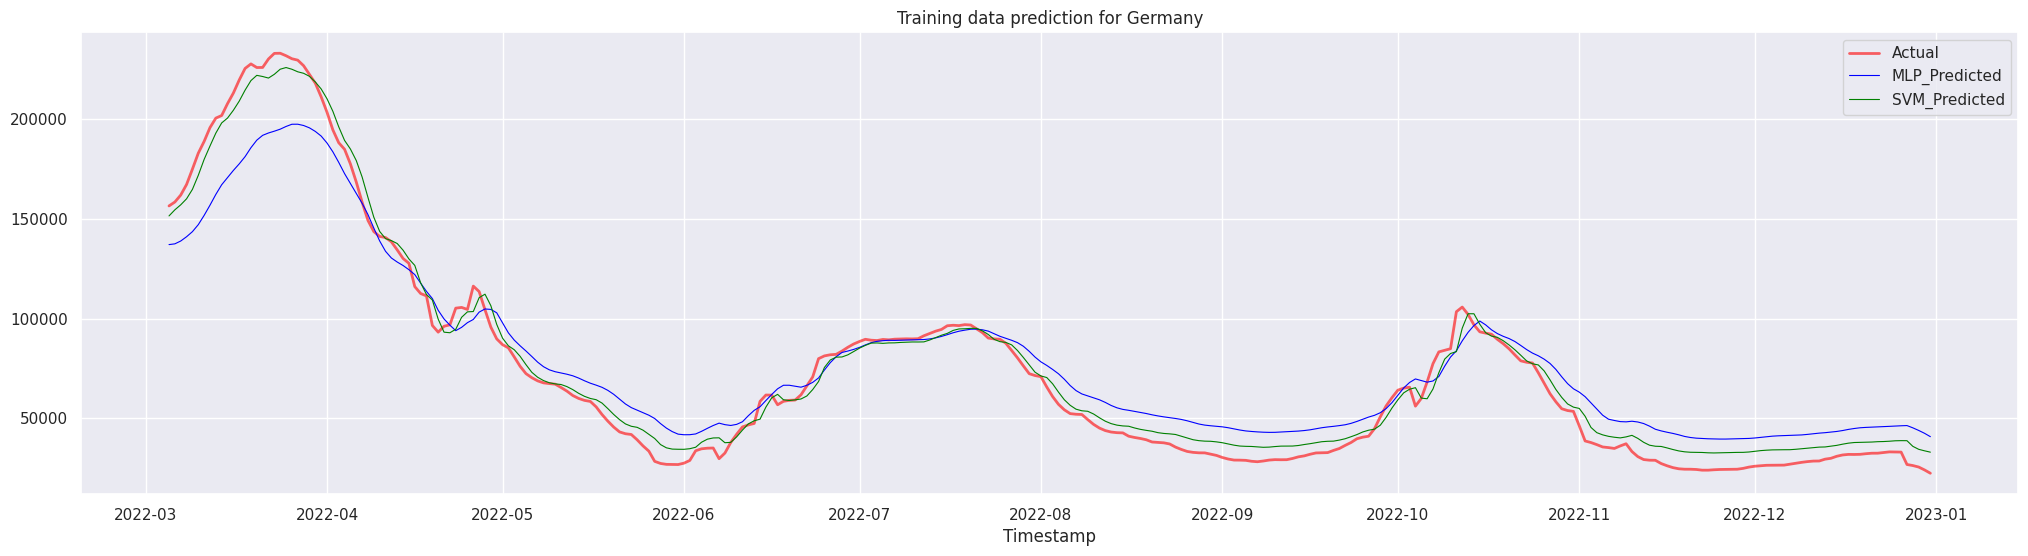

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps_2, y_train_2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps_2, y_train_MLP_2_pred, color = 'blue', linewidth=0.8)
plt.plot(train_timestamps_2, y_train_2_pred, color = 'green', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction for Germany")
plt.show()

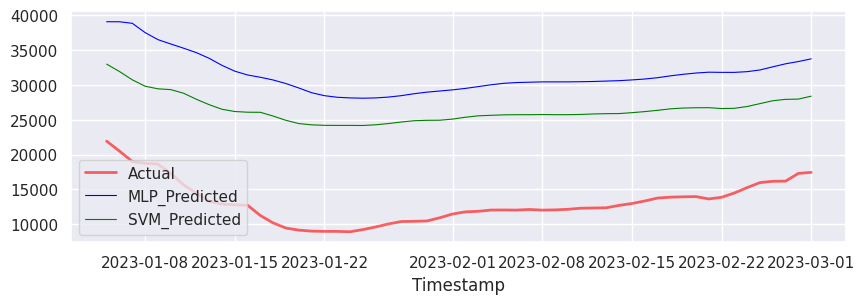

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps_2, y_test_2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps_2, y_test_MLP_2_pred, color = 'blue', linewidth=0.8)
plt.plot(test_timestamps_2, y_test_2_pred, color = 'green', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [ ]:
y_test_2_pred,

(array([[32962.50998952],
        [31901.57096033],
        [30711.03224826],
        [29796.41544766],
        [29423.20042927],
        [29308.67603919],
        [28790.85310142],
        [27925.11300235],
        [27147.80700592],
        [26493.46186436],
        [26167.9421068 ],
        [26066.66613505],
        [26056.0146739 ],
        [25513.91548879],
        [24900.9933759 ],
        [24442.73566784],
        [24256.75720195],
        [24186.16812638],
        [24174.88465974],
        [24177.43030709],
        [24163.68598123],
        [24266.36084487],
        [24444.88274813],
        [24663.35565111],
        [24847.09273752],
        [24906.26284564],
        [24918.98086658],
        [25079.56305655],
        [25345.4697137 ],
        [25550.17142938],
        [25624.48210504],
        [25690.57044367],
        [25713.08894854],
        [25710.44710388],
        [25734.12561341],
        [25713.16508172],
        [25713.99037668],
        [25745.1701366 ],
        [258

### Model evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test_2,y_test_MLP_2_pred))

print('MAE for testing data: ', mean_absolute_error( y_test_2, y_test_MLP_2_pred))
print('R squred is : ', r2_score(y_test_2, y_test_MLP_2_pred))

MSE for testing data:  337215067.40862083
MAE for testing data:  18329.779676270206
R squred is :  -35.59707307454157


In [ ]:
print('MAPE for testing data: ', mape( y_test_2, y_test_MLP_2_pred))

MAPE for testing data:  147.3167442213829


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train_2,y_train_MLP_2_pred))
print('MAE for training data: ', mean_absolute_error( y_train_2, y_train_MLP_2_pred))
print('R squred is : ', r2_score(y_train_2,y_train_MLP_2_pred))

MSE for training data:  226679830.57394367
MAE for training data:  12348.218308458463
R squred is :  0.9233204103372801


In [ ]:
print('MAPE for training data: ', mape( y_train_2, y_train_MLP_2_pred))

MAPE for training data:  25.943270870830844


## USA

In [ ]:
# Define your MLP model
mlp = MLPRegressor()

# Define the parameter grid for grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # List of alpha values to try

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_3, y_train_3)  # X is your feature matrix, y is your target variable

# Get the best alpha value and corresponding MSE score
best_alpha_MLP_U = grid_search.best_params_['alpha']
best_mse_MLP_U = -grid_search.best_score_
print("Best alpha:", best_alpha_MLP_U)
print("Best MSE Score:", best_mse_MLP_U)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multila

Best alpha: 1
Best MSE Score: 5730575219.637365


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
model_MLP_3 =  MLPRegressor(hidden_layer_sizes=(900,7), activation='relu',
             solver='adam',alpha=best_alpha_MLP_U,
             batch_size=13, learning_rate='constant',learning_rate_init=0.001,
             max_iter=1000, shuffle=True,random_state=5, tol=0.001,
             early_stopping=True,
             verbose=True,
             validation_fraction=0.2
             )

In [ ]:
model_MLP_3.fit(x_train_3, y_train_3[:,0])

Iteration 1, loss = 2923588038.76453161
Validation score: -4.995589
Iteration 2, loss = 2923523438.39689779
Validation score: -4.995400
Iteration 3, loss = 2923383586.65128136
Validation score: -4.994992
Iteration 4, loss = 2923117523.09119940
Validation score: -4.994249
Iteration 5, loss = 2922663046.95263720
Validation score: -4.993036
Iteration 6, loss = 2921956150.62971640
Validation score: -4.991230
Iteration 7, loss = 2920913725.08168697
Validation score: -4.988674
Iteration 8, loss = 2919452306.36331367
Validation score: -4.985239
Iteration 9, loss = 2917508720.82998705
Validation score: -4.980670
Iteration 10, loss = 2915047366.81248140
Validation score: -4.974890
Iteration 11, loss = 2911902573.75801897
Validation score: -4.967804
Iteration 12, loss = 2908033039.07650089
Validation score: -4.958985
Iteration 13, loss = 2903425792.09778500
Validation score: -4.948492
Iteration 14, loss = 2897918140.41623974
Validation score: -4.936215
Iteration 15, loss = 2891459848.70888710
Va

MLPRegressor(alpha=1, batch_size=13, early_stopping=True,
             hidden_layer_sizes=(900, 7), max_iter=1000, random_state=5,
             tol=0.001, validation_fraction=0.2, verbose=True)

In [ ]:
y_train_MLP_3_pred = model_MLP_3.predict(x_train_3).reshape(-1,1)
y_test_MLP_3_pred = model_MLP_3.predict(x_test_3).reshape(-1,1)

print(y_train_MLP_3_pred.shape, y_test_MLP_3_pred.shape)

(302, 1) (56, 1)


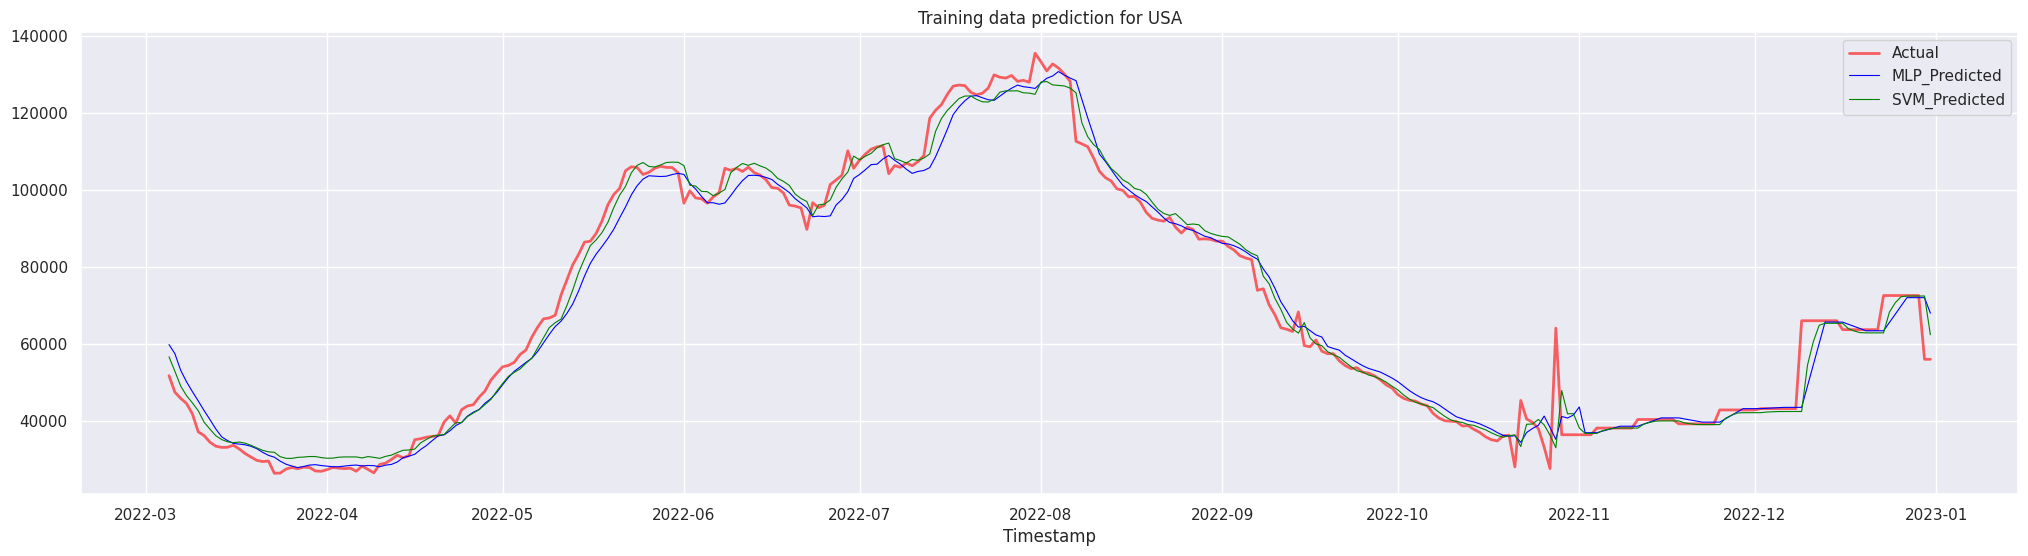

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps_3, y_train_3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps_3, y_train_MLP_3_pred, color = 'blue', linewidth=0.8)
plt.plot(train_timestamps_3, y_train_3_pred, color = 'green', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted',])
plt.xlabel('Timestamp')
plt.title("Training data prediction for USA")
plt.show()

In [ ]:
y_test_3_pred.shape

(56, 1)

In [ ]:
y_test_3.shape

(56, 1)

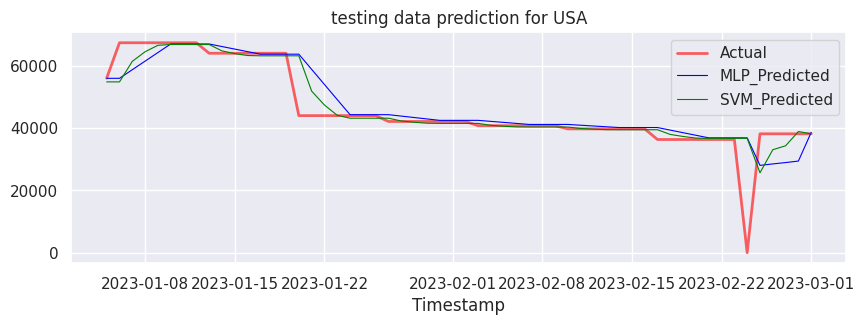

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps_3, y_test_3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps_3, y_test_MLP_3_pred, color = 'blue', linewidth=0.8)
plt.plot(test_timestamps_3, y_test_3_pred, color = 'green', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted',])
plt.xlabel('Timestamp')
plt.title("testing data prediction for USA")
plt.show()

### MODEL evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test_3,y_test_MLP_3_pred))

print('MAE for testing data: ', mean_absolute_error( y_test_3, y_test_MLP_3_pred))
print('R squred is : ', r2_score(y_test_3, y_test_MLP_3_pred))

MSE for testing data:  49524404.173783794
MAE for testing data:  3475.544698246324
R squred is :  0.7000413517446049


In [ ]:
print('MAPE for testing data: ', mape( y_test_3, y_test_MLP_3_pred))

MAPE for testing data:  6584442252721.478


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train_3,y_train_3_pred))
print('MAE for training data: ', mean_absolute_error( y_train_3, y_train_MLP_3_pred))
print('R squred is : ', r2_score(y_train_3,y_train_MLP_3_pred))

MSE for training data:  17546945.73021595
MAE for training data:  3317.844515992632
R squred is :  0.9765559706069432


In [ ]:
print('MAPE for testing data: ', mape( y_train_3, y_train_MLP_3_pred))

MAPE for testing data:  5.353741981063857


## another fucking table

In [ ]:
SVM_MLP_training ={"Japan_Train_Actual":y_train[:,0],
    "Japan_Train_Predictions": y_train_MLP_pred[:,0],
    "Germany_Train_Actual":y_train_2[:,0],
    "Germany_Train_Predictions": y_train_MLP_2_pred[:,0],
    "USA_Train_Actual":y_train_3[:,0],
    "USA_Train_Predictions": y_train_MLP_3_pred[:,0],




      }

df_MLP_training = pd.DataFrame(SVM_MLP_training)
df_MLP_training.index = df1_Japan_SVM_train.index

In [ ]:
df_MLP_training = df_MLP_training.round().astype(int)
df_MLP_training.head()

,Japan_Train_Actual,Japan_Train_Predictions,Germany_Train_Actual,Germany_Train_Predictions,USA_Train_Actual,USA_Train_Predictions
date,,,,,,
2022-03-01,65558,75076,156549,137137,51776,59847
2022-03-02,64680,74907,158513,137515,47501,57494
2022-03-03,62702,74695,161992,138933,45877,53151
2022-03-04,61174,74276,167325,141084,44559,50186
2022-03-05,59398,73429,175017,143631,41850,47625


In [ ]:
df_MLP_training.to_excel('/content/drive/MyDrive/FYP/FYP.xlsx', sheet_name = 'New_sheet_3')

In [ ]:
SVM_MLP_test={"Japan_Actual":y_test[:,0],
    "Japan_Predictions": y_test_MLP_pred[:,0],
    "Germany_Actual":y_test_2[:,0],
    "Germany_Predictions": y_test_MLP_2_pred[:,0],
    "USA_Actual":y_test_3[:,0],
    "USA_Predictions": y_test_MLP_3_pred[:,0],




      }

df_MLP_test = pd.DataFrame(SVM_MLP_test)
df_MLP_test.index = df1_Germany_SVM_test.index

In [ ]:
df_MLP_test = df_MLP_test.round().astype(int)
df_MLP_test.head()

,Japan_Actual,Japan_Predictions,Germany_Actual,Germany_Predictions,USA_Actual,USA_Predictions
date,,,,,,
2023-01-05,120364,116065,21914,39038,56029,55973
2023-01-06,134187,110996,20495,39038,67388,55973
2023-01-07,152928,114014,19003,38814,67388,58734
2023-01-08,167730,123848,18746,37488,67388,61489
2023-01-09,170451,133671,18628,36477,67388,64246


In [ ]:
df_MLP_test.to_excel('/content/drive/MyDrive/FYP/FYP.xlsx', sheet_name = 'New_sheet_4')

#import linear regression

## Japan

In [ ]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_LR = LinearRegression()

In [ ]:
model_LR.fit(x_train, y_train[:,0])

LinearRegression()

In [ ]:
y_train_LR_pred = model_LR.predict(x_train).reshape(-1,1)
y_test_LR_pred = model_LR.predict(x_test).reshape(-1,1)

print(y_train_LR_pred.shape, y_test_LR_pred.shape)

(302, 1) (56, 1)


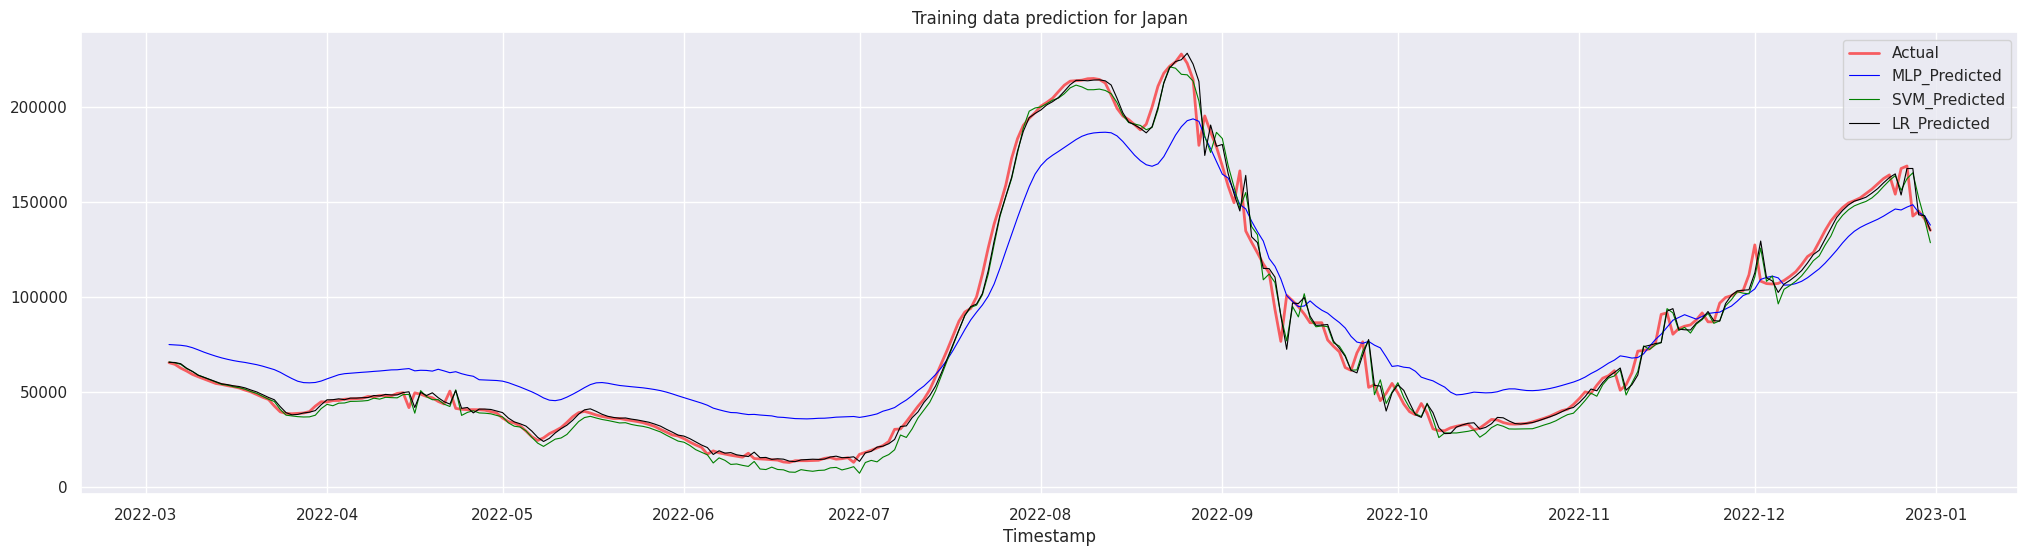

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_MLP_pred, color = 'blue', linewidth=0.8)
plt.plot(train_timestamps, y_train_pred, color = 'green', linewidth=0.8)
plt.plot(train_timestamps, y_train_LR_pred, color = 'black', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted','LR_Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction for Japan")
plt.show()

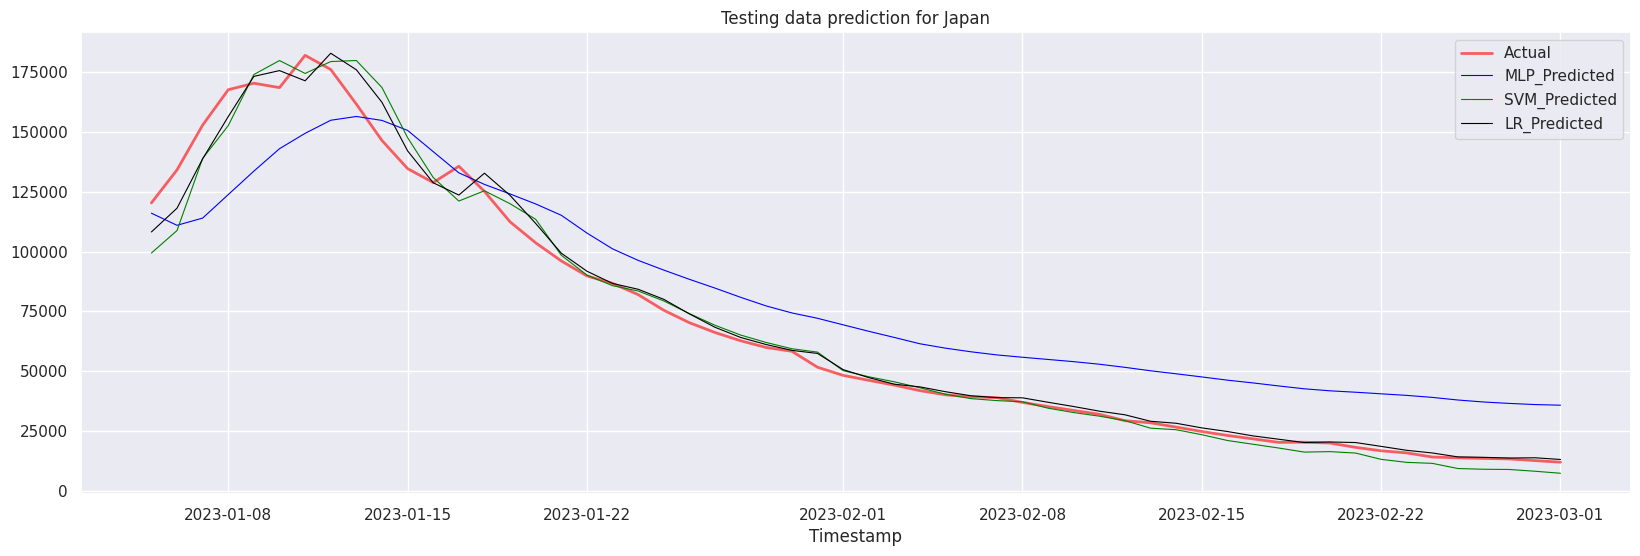

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_MLP_pred, color = 'blue', linewidth=0.8)
plt.plot(test_timestamps, y_test_pred, color = 'green', linewidth=0.8)
plt.plot(test_timestamps, y_test_LR_pred, color = 'black', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted','LR_Predicted'])
plt.title("Testing data prediction for Japan")
plt.xlabel('Timestamp')
plt.show()

### MODEL evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test,y_test_LR_pred))

print('MAE for testing data: ', mean_absolute_error( y_test, y_test_LR_pred))
print('R squred is : ', r2_score(y_test, y_test_LR_pred))

MSE for testing data:  35869195.23123877
MAE for testing data:  3920.0794191407463
R squred is :  0.9873500628655044


In [ ]:
print('MAPE for testing data: ', mape( y_test, y_test_LR_pred))

MAPE for testing data:  5.377255003248483


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train,y_train_LR_pred))
print('MAE for training data: ', mean_absolute_error( y_train,y_train_LR_pred))
print('R squred is : ', r2_score(y_train,y_train_LR_pred))

MSE for training data:  34118675.613636196
MAE for training data:  3255.2780341205994
R squred is :  0.9904894089587841


In [ ]:
print('MAPE for testing data: ', mape( y_train,y_train_LR_pred))

MAPE for testing data:  4.908066109134858


## Germany

In [ ]:
model_LR.fit(x_train_2, y_train_2[:,0])

LinearRegression()

In [ ]:
y_train_LR_2_pred = model_LR.predict(x_train_2).reshape(-1,1)
y_test_LR_2_pred = model_LR.predict(x_test_2).reshape(-1,1)

print(y_train_LR_pred.shape, y_test_LR_pred.shape)

(302, 1) (56, 1)


In [ ]:
y_train_2_pred

array([[151533.83749486],
       [154591.59762309],
       [157107.04078071],
       [160127.90565008],
       [164857.4974336 ],
       [171905.02389768],
       [179885.89029903],
       [186615.53621203],
       [193102.55045783],
       [198214.5864174 ],
       [200660.11004451],
       [204583.94729335],
       [209174.08929112],
       [214679.97251847],
       [219470.14561391],
       [222105.16639218],
       [221522.69044678],
       [220744.67923428],
       [222637.51351248],
       [225186.57920041],
       [226027.74725341],
       [225165.74539771],
       [223888.77507503],
       [223137.70428654],
       [221620.86422656],
       [218781.71663963],
       [215283.36352438],
       [210341.3152528 ],
       [204059.42531546],
       [196285.38456188],
       [189443.68820163],
       [185115.57484163],
       [179333.80423388],
       [171080.18905052],
       [160801.88686917],
       [150877.4110276 ],
       [143742.3626145 ],
       [140148.33566745],
       [1391

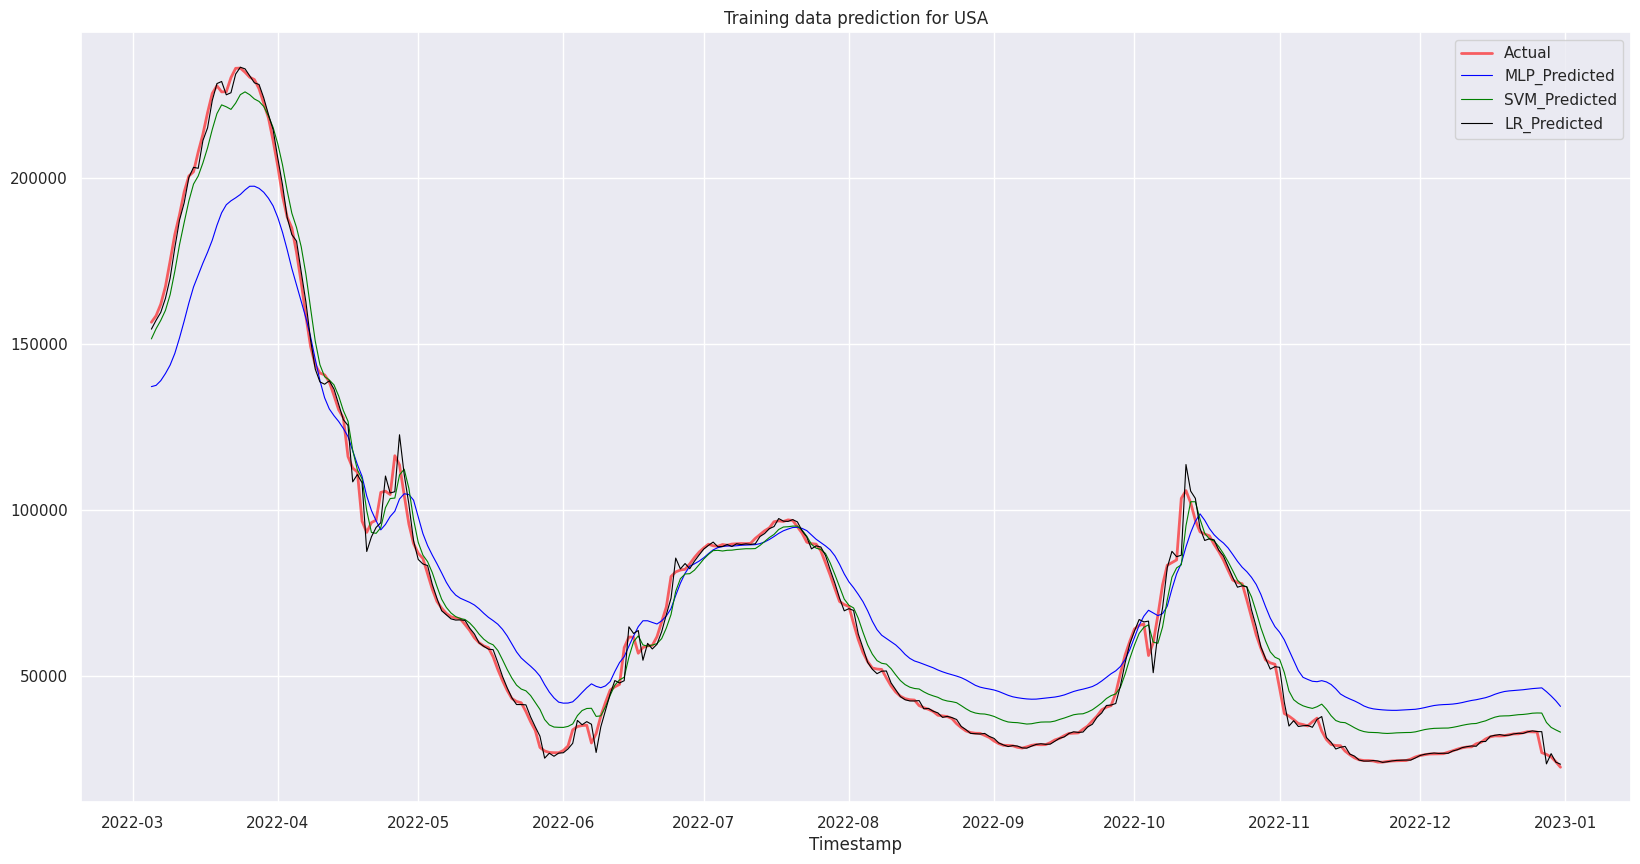

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_timestamps_2, y_train_2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps_2, y_train_MLP_2_pred, color = 'blue', linewidth=0.8)
plt.plot(train_timestamps_2, y_train_2_pred, color = 'green', linewidth=0.8)
plt.plot(train_timestamps_2, y_train_LR_2_pred, color = 'black', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted','LR_Predicted',])
plt.xlabel('Timestamp')
plt.title("Training data prediction for USA")
plt.show()

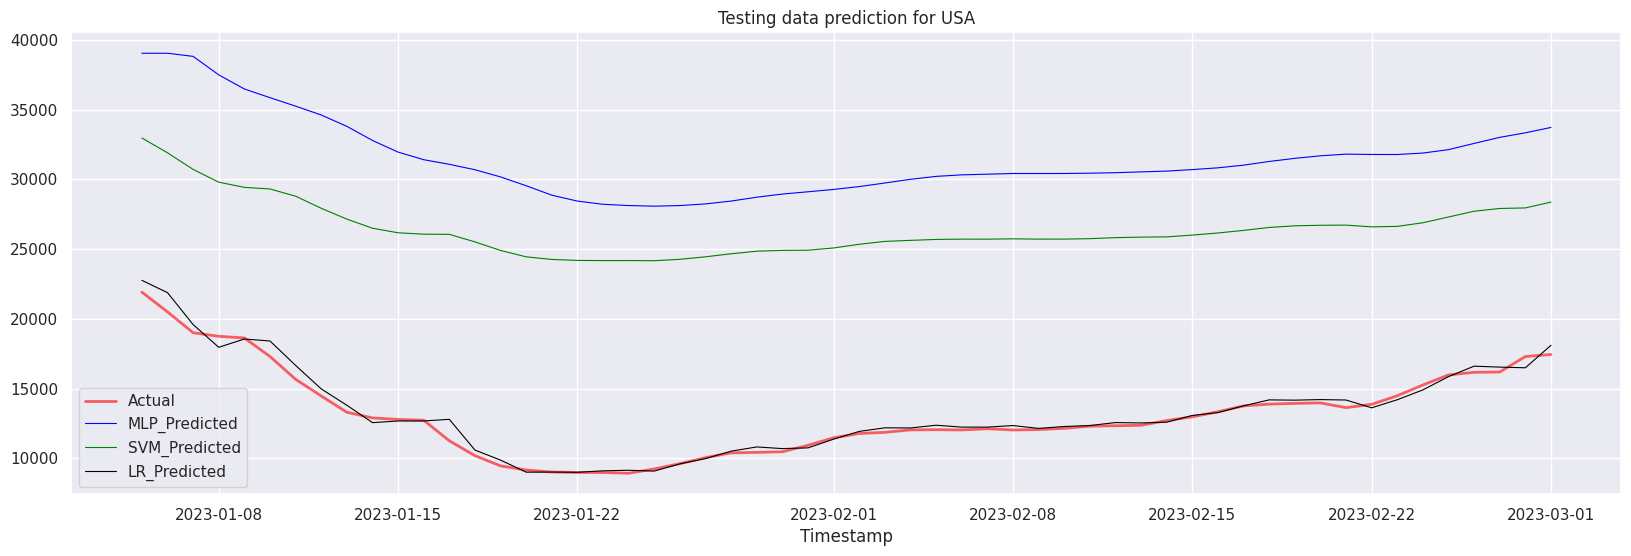

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_timestamps, y_test_2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_MLP_2_pred, color = 'blue', linewidth=0.8)
plt.plot(test_timestamps, y_test_2_pred, color = 'green', linewidth=0.8)
plt.plot(test_timestamps, y_test_LR_2_pred, color = 'black', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted','LR_Predicted',])
plt.title("Testing data prediction for USA")
plt.xlabel('Timestamp')
plt.show()

### model evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test_2,y_test_LR_2_pred))

print('MAE for testing data: ', mean_absolute_error( y_test_2,y_test_LR_2_pred))
print('R squred is : ', r2_score(y_test_2,y_test_LR_2_pred))

MSE for testing data:  218898.758798425
MAE for testing data:  330.3139772284208
R squred is :  0.9762434877740354


In [ ]:
print('MAPE for testing data: ', mape( y_test_2,y_test_LR_2_pred))

MAPE for testing data:  2.3620235434365986


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train_2, y_train_LR_2_pred))
print('MAE for training data: ', mean_absolute_error( y_train_2, y_train_LR_2_pred))
print('R squred is : ', r2_score(y_train_2, y_train_LR_2_pred))

MSE for training data:  7835563.873957113
MAE for training data:  1658.0021429470585
R squred is :  0.9973494429517183


In [ ]:
print('MAPE for testing data: ', mape(y_train_2, y_train_LR_2_pred))

MAPE for testing data:  2.5190534276054364


## USA

In [ ]:
model_LR.fit(x_train_3, y_train_3[:,0])

LinearRegression()

In [ ]:
y_train_LR_3_pred = model_LR.predict(x_train_3).reshape(-1,1)
y_test_LR_3_pred = model_LR.predict(x_test_3).reshape(-1,1)



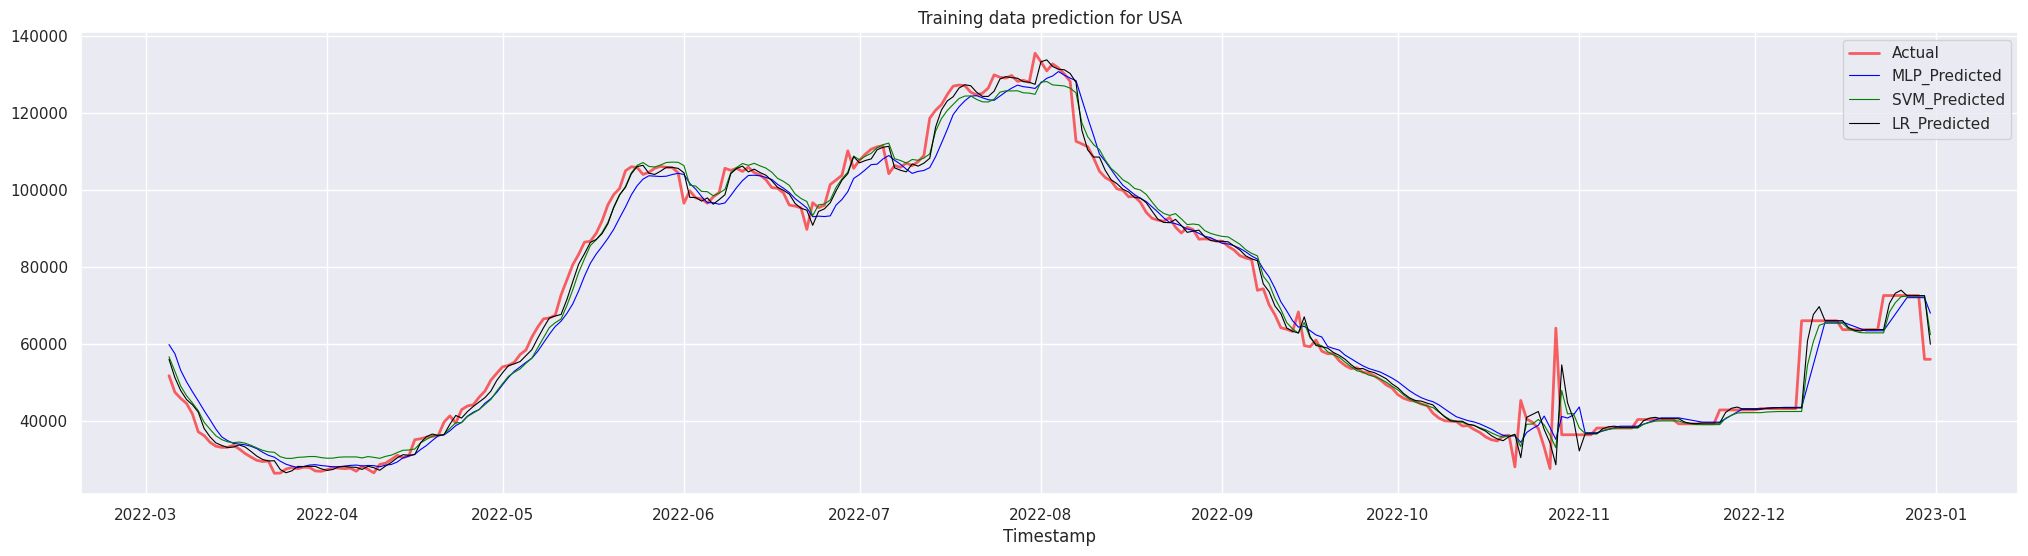

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps_3, y_train_3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps_3, y_train_MLP_3_pred, color = 'blue', linewidth=0.8)
plt.plot(train_timestamps_3, y_train_3_pred, color = 'green', linewidth=0.8)
plt.plot(train_timestamps_3, y_train_LR_3_pred, color = 'black', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted','LR_Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction for USA")
plt.show()

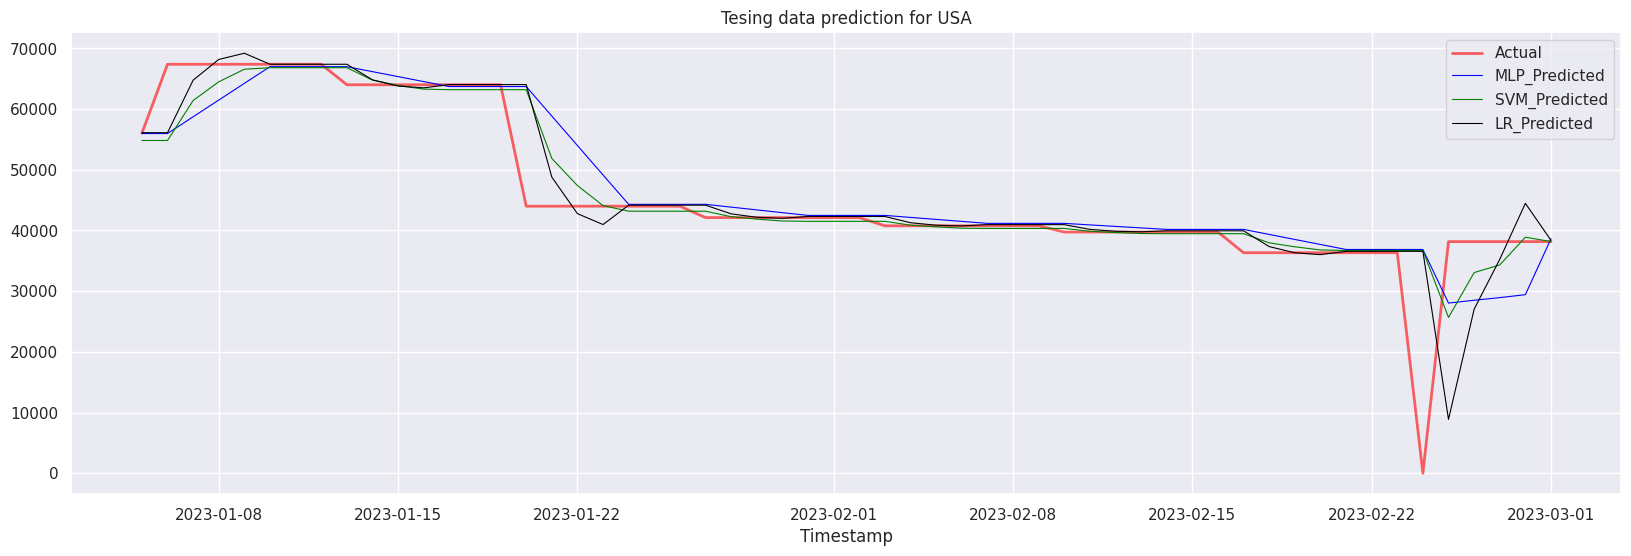

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_timestamps, y_test_3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_MLP_3_pred, color = 'blue', linewidth=0.8)
plt.plot(test_timestamps_3, y_test_3_pred, color = 'green', linewidth=0.8)
plt.plot(test_timestamps_3, y_test_LR_3_pred, color = 'black', linewidth=0.8)
plt.legend(['Actual','MLP_Predicted','SVM_Predicted','LR_Predicted'])
plt.title("Tesing data prediction for USA")
plt.xlabel('Timestamp')
plt.show()

### MODEL evaluation

In [ ]:
print('MSE for testing data: ', mean_squared_error(y_test_3,y_test_LR_3_pred))

print('MAE for testing data: ', mean_absolute_error( y_test, y_test_LR_3_pred))
print('R squred is : ', r2_score(y_test_3, y_test_LR_3_pred))

MSE for testing data:  53149276.4813006
MAE for testing data:  35135.67539942922
R squred is :  0.6780862809951271


In [ ]:
print('MAPE for testing data: ', mape( y_test, y_test_LR_3_pred))

MAPE for testing data:  58.84106475968542


In [ ]:
print('MSE for training data: ', mean_squared_error(y_train_3,y_train_LR_3_pred))
print('MAE for training data: ', mean_absolute_error( y_train_3,y_train_LR_3_pred))
print('R squred is : ', r2_score(y_train_3,y_train_LR_3_pred))

MSE for training data:  14977230.001024177
MAE for training data:  1943.5748075082065
R squred is :  0.9854378308522435


In [ ]:
print('MAPE for testing data: ', mape( y_train_3,y_train_LR_3_pred))

MAPE for testing data:  3.3186368790370695


## another another fucking table

In [ ]:
SVM_LR_training ={"Japan_Train_Actual":y_train[:,0],
    "Japan_Train_Predictions": y_train_LR_pred[:,0],
    "Germany_Train_Actual":y_train_2[:,0],
    "Germany_Train_Predictions": y_train_LR_2_pred[:,0],
    "USA_Train_Actual":y_train_3[:,0],
    "USA_Train_Predictions": y_train_LR_3_pred[:,0],




      }

df_LR_training = pd.DataFrame(SVM_MLP_training)
df_LR_training.index = df1_Japan_SVM_train.index

In [ ]:
df_LR_training = df_LR_training.round().astype(int)
df_LR_training

,Japan_Train_Actual,Japan_Train_Predictions,Germany_Train_Actual,Germany_Train_Predictions,USA_Train_Actual,USA_Train_Predictions
date,,,,,,
2022-03-01,65558,75076,156549,137137,51776,59847
2022-03-02,64680,74907,158513,137515,47501,57494
2022-03-03,62702,74695,161992,138933,45877,53151
2022-03-04,61174,74276,167325,141084,44559,50186
2022-03-05,59398,73429,175017,143631,41850,47625
...,...,...,...,...,...,...
2022-12-23,168974,147357,26742,46285,72573,72021
2022-12-24,142634,148598,26212,45145,72573,72021
2022-12-25,145310,144532,25463,43842,72573,72021


In [ ]:
df_LR_training.to_excel('/content/drive/MyDrive/FYP/FYP.xlsx', sheet_name = 'New_sheet_4')

In [ ]:
LR_test={"Japan_Actual":y_test[:,0],
    "Japan_Predictions": y_test_LR_pred[:,0],
    "Germany_Actual":y_test_2[:,0],
    "Germany_Predictions": y_test_LR_2_pred[:,0],
    "USA_Actual":y_test_3[:,0],
    "USA_Predictions": y_test_LR_3_pred[:,0],




      }

df_LR_test = pd.DataFrame(LR_test)
df_LR_test.index = df1_Germany_SVM_test.index

In [ ]:
df_LR_test = df_LR_test.round().astype(int)
df_LR_test.head()

,Japan_Actual,Japan_Predictions,Germany_Actual,Germany_Predictions,USA_Actual,USA_Predictions
date,,,,,,
2023-01-05,120364,108213,21914,22758,56029,56113
2023-01-06,134187,118157,20495,21875,67388,56113
2023-01-07,152928,138801,19003,19586,67388,64768
2023-01-08,167730,156494,18746,17958,67388,68185
2023-01-09,170451,173311,18628,18552,67388,69204


In [ ]:
df_LR_test.to_excel('/content/drive/MyDrive/FYP/FYP.xlsx', sheet_name = 'New_sheet_5')